In [141]:
options(repr.plot.width = 10, repr.plot.height = 8)

In [2]:
library(gridExtra)
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




- use `non-target control` to determine 3 threshholds . 

In [5]:
getwd()

[1] "/gpfs/commons/groups/sanjana_lab/cdai/TFscreen"

In [4]:
setwd("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen")

In [6]:
screen = read.csv('plot_screen_data.csv', header = T, sep = ',')

In [7]:
theme_set(theme_bw())

## scatter plot  of Replicate 2: Early ES, Late ES

- X= S6/S5; Y=S6/S2: Z=S5/S2, 3 scatter plots
- color 1: Non target control vs target
- Targeted control: above thresh hold vs. non above thresh hold (90 percentile)

In [9]:
colnames(screen) %>% t

ID,Gene,S1,S2,S3,S4,S5,S6,S7,S8,⋯,r32,r21flag,r31flag,r32flag,r76,r86,r87,r76flag,r86flag,r87flag


In [46]:
head(screen)

,ID,Gene,S1,S2,S3,S4,S5,S6,S7,S8,⋯,r32,r21flag,r31flag,r32flag,r76,r86,r87,r76flag,r86flag,r87flag
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,GUIDES_sg00000,AATF,0.11595272,0.05571956,0.4096040,0.2904734,0.03575057,0.53129575,0.35367672,1.13e-05,⋯,7.351170e+00,Hit,Non-hit,Non-hit,6.656871e-01,2.126876e-05,3.195008e-05,Non-hit,Non-hit,Non-hit
2,GUIDES_sg00001,AATF,0.02319982,0.00001860,0.0000178,0.0000161,0.01192480,0.00001150,0.00001540,1.13e-05,⋯,9.569892e-01,Hit,Hit,Non-hit,1.339130e+00,9.826087e-01,7.337662e-01,Non-hit,Non-hit,Non-hit
3,GUIDES_sg00002,AATF,0.00001160,0.00001860,0.0000178,0.0000161,0.00001190,0.00001150,0.00001540,1.13e-05,⋯,9.569892e-01,Non-hit,Non-hit,Non-hit,1.339130e+00,9.826087e-01,7.337662e-01,Non-hit,Non-hit,Non-hit
4,GUIDES_sg00003,AATF,0.71884657,0.98406952,0.8726144,0.6777497,1.83459608,1.40906964,0.53819568,1.13e-05,⋯,8.867406e-01,Non-hit,Non-hit,Non-hit,3.819511e-01,8.019476e-06,2.099608e-05,Hit,Non-hit,Non-hit
5,GUIDES_sg00004,AATF,0.04638804,0.01858557,0.0000178,0.0000161,0.09531499,0.05775983,0.00001540,1.13e-05,⋯,9.577325e-04,Hit,Hit,Hit,2.666213e-04,1.956377e-04,7.337662e-01,Hit,Non-hit,Non-hit
6,GUIDES_sg00005,AATF,0.00001160,0.00001860,0.0178259,0.2259273,0.05957633,0.00001150,0.01539196,1.13e-05,⋯,9.583818e+02,Non-hit,Non-hit,Non-hit,1.338431e+03,9.826087e-01,7.341497e-04,Non-hit,Non-hit,Non-hit


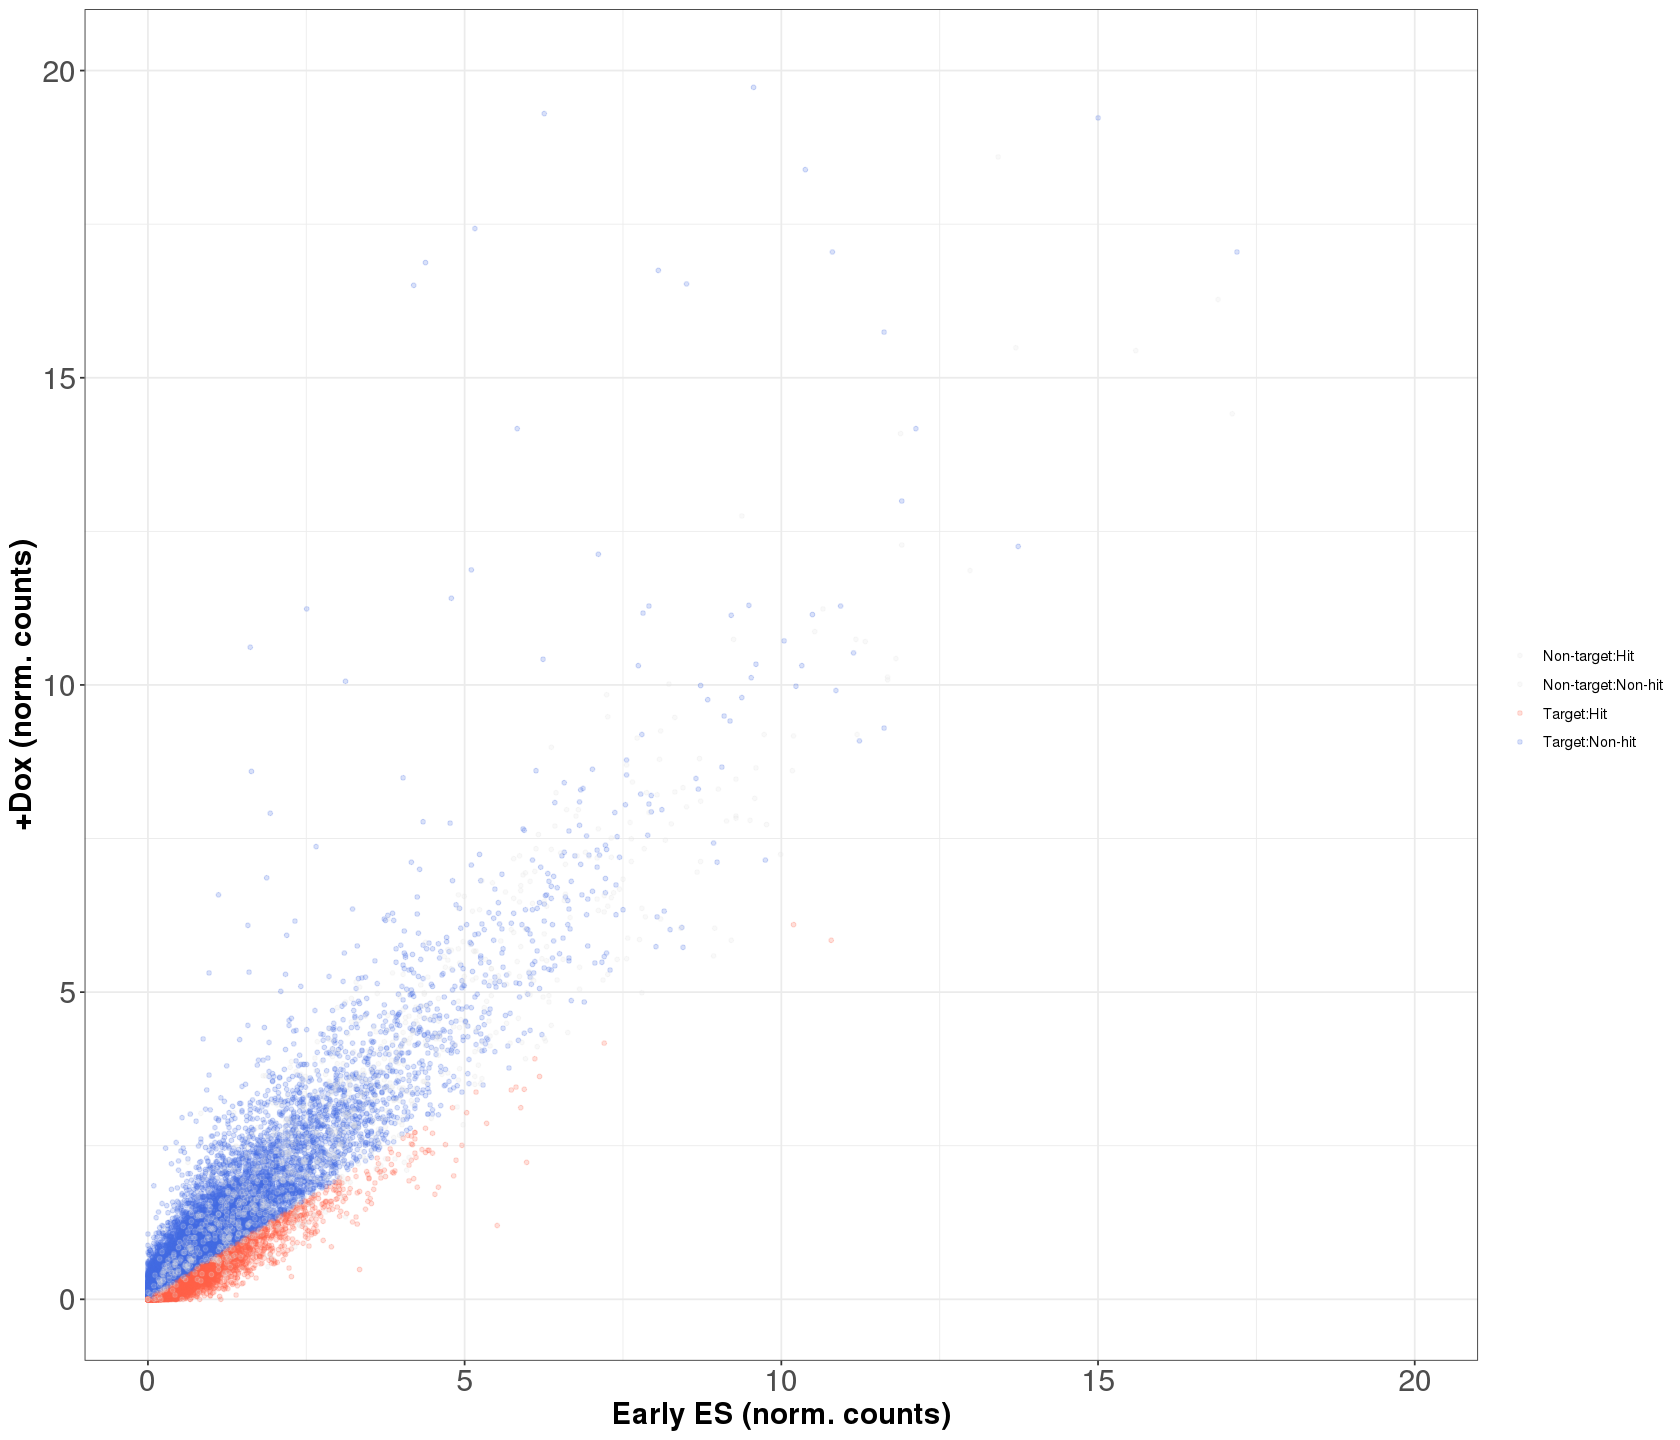

In [36]:
# Induced vs. ES
ggplot(screen) + geom_point(aes(x = S2, y = S6, col = Target:r62flag), size=1, alpha=0.2) + 
    coord_cartesian(xlim = c(0,20), ylim = c(0,20)) +
    labs(y="+Dox (norm. counts)", x="Early ES (norm. counts)") +
    scale_color_manual(name='',values = c('grey90', 'grey90','tomato','royalblue')) +
    theme(axis.text = element_text(size = 18), axis.title=element_text(size=18, face='bold'))
ggsave("neville_pdf/fig2_C1_dox_vs_earlyES.pdf", width = 11, height = 8, units = "in")

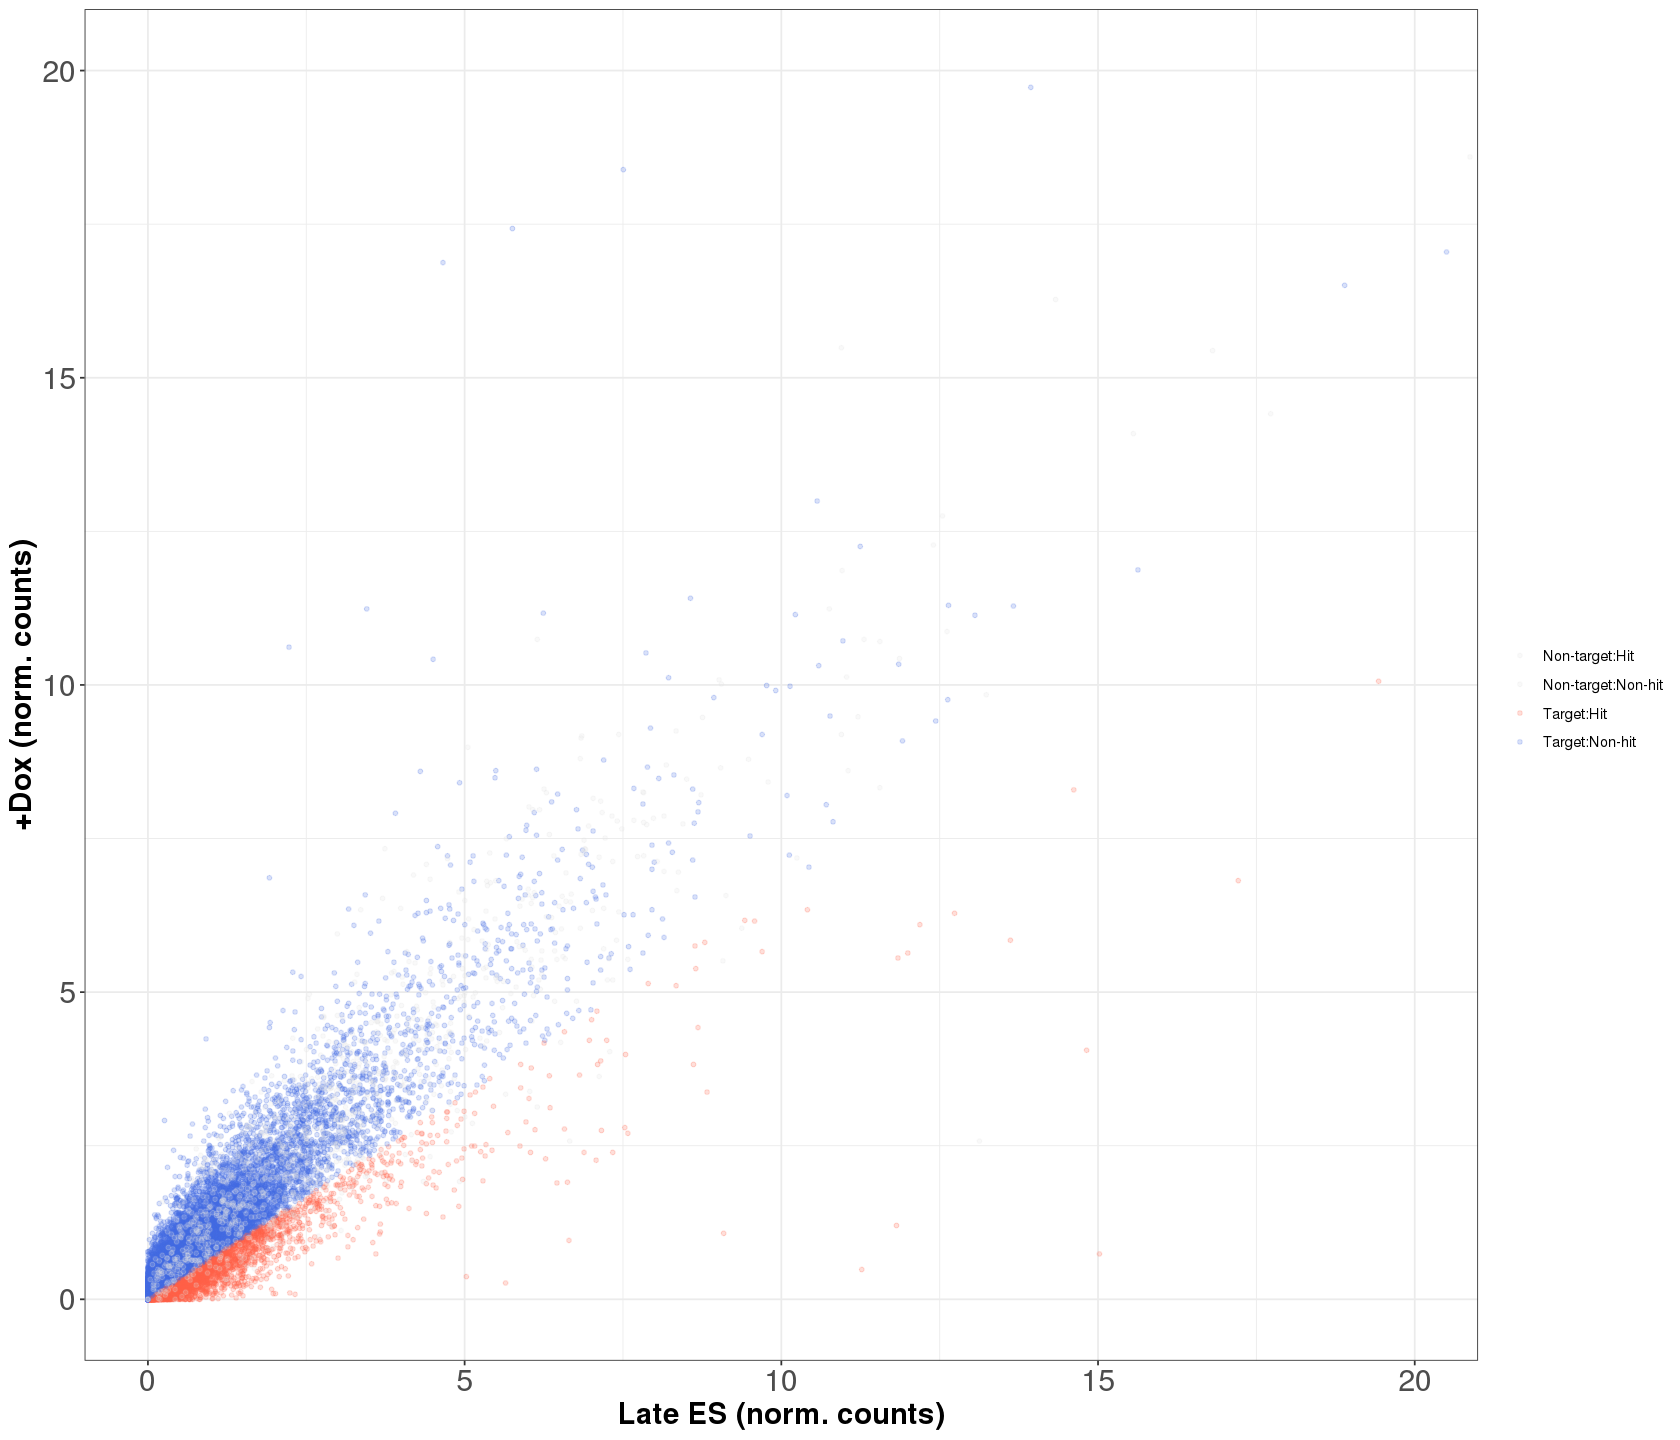

In [35]:
# Induced vs. ES2
ggplot(screen) + geom_point(aes(x = S5, y = S6, col = Target:r65flag), size=1, alpha=0.2) + 
    coord_cartesian(xlim = c(0,20), ylim = c(0,20)) +
    labs(y="+Dox (norm. counts)", x="Late ES (norm. counts)") +
    scale_color_manual(name='',values = c('grey90', 'grey90','tomato','royalblue')) +
    theme(axis.text = element_text(size = 18), axis.title=element_text(size=18, face='bold'))
ggsave("neville_pdf/fig2_C2_dox_vs_lateES.pdf", width = 11, height = 8, units = "in")

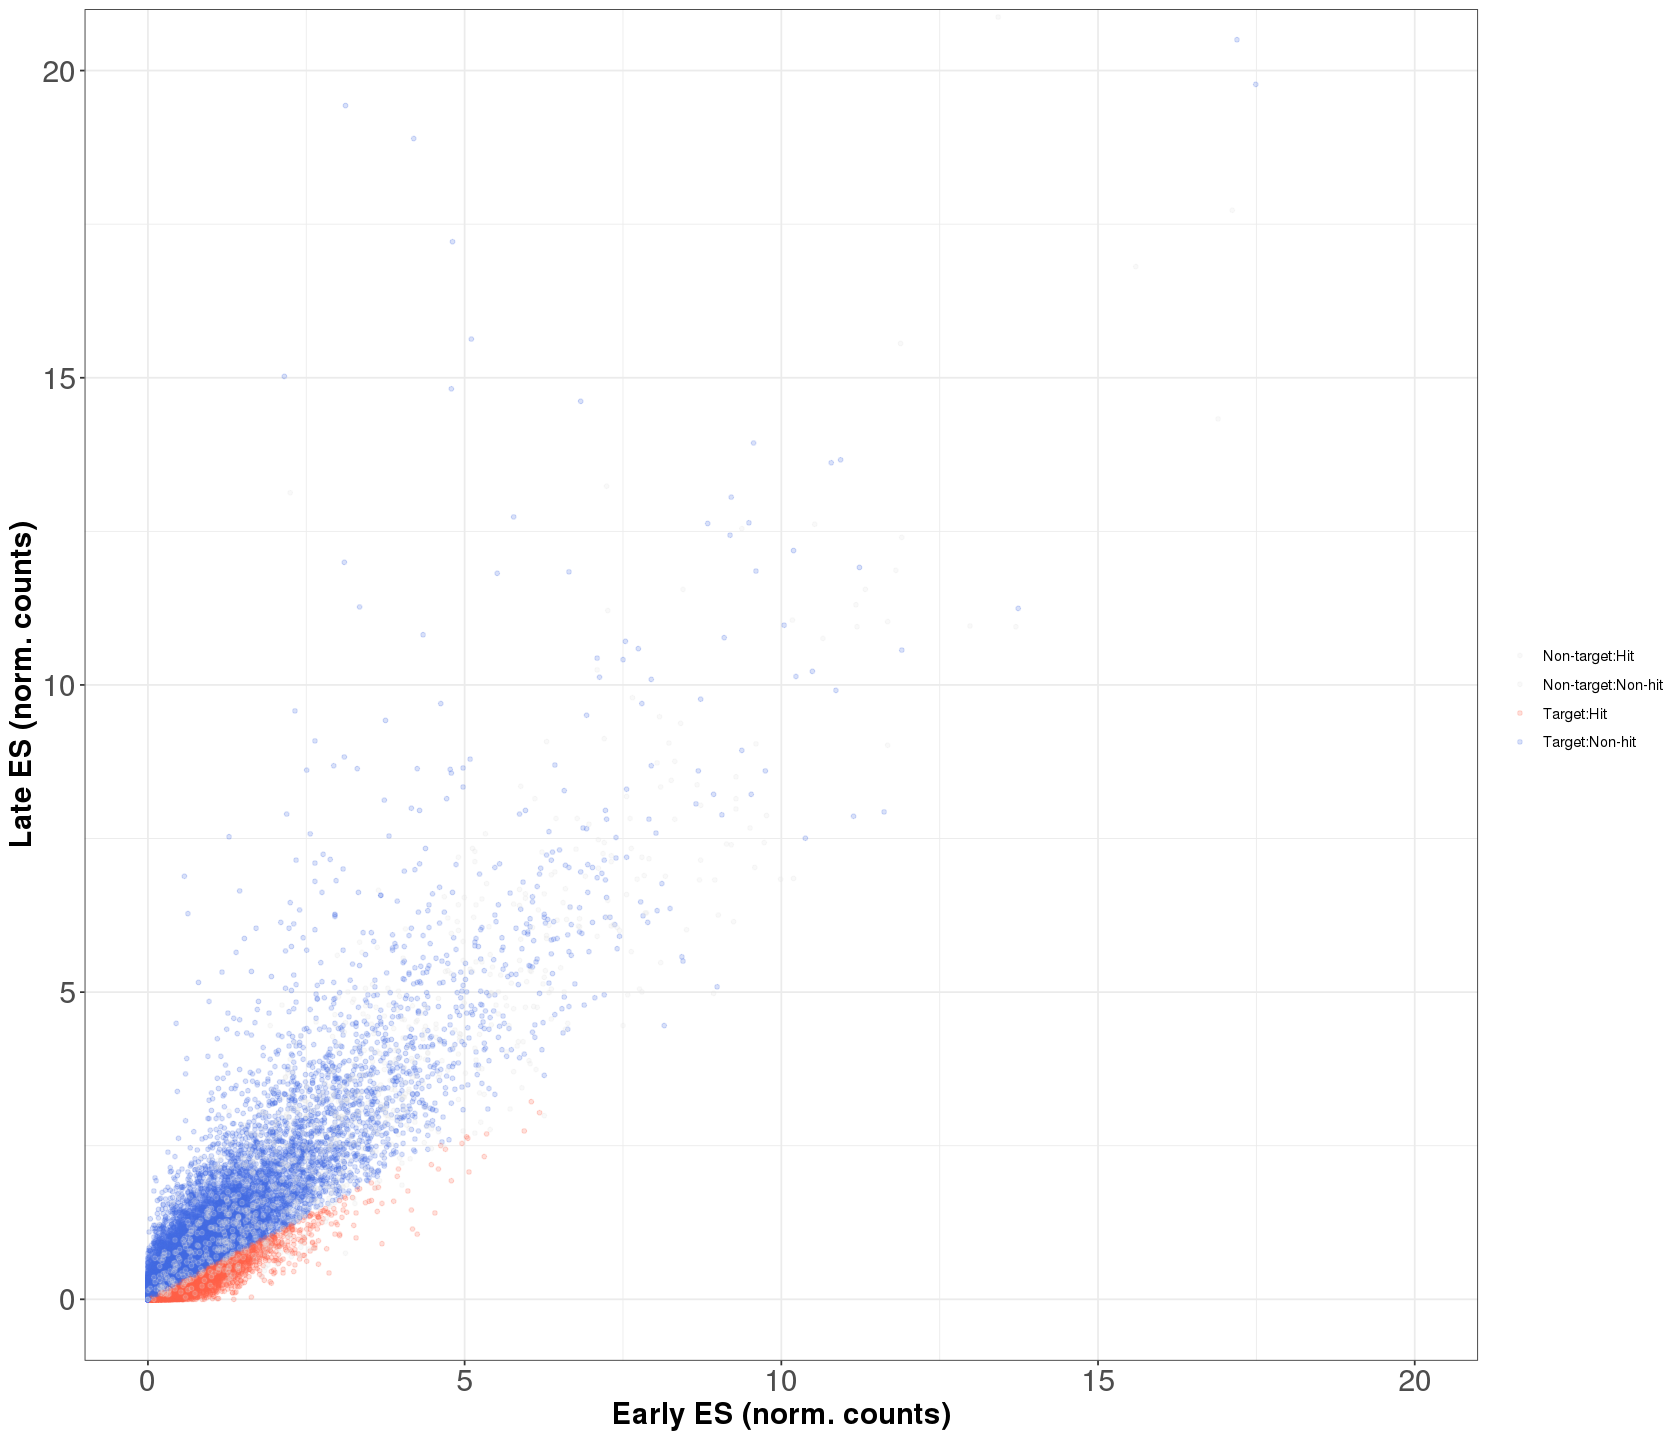

In [37]:
# ES2 vs. ES
ggplot(screen) + geom_point(aes(x = S2, y = S5, col = Target:r52flag), size=1, alpha=0.2) + 
    coord_cartesian(xlim = c(0,20), ylim = c(0,20)) +
    labs(y="Late ES (norm. counts)", x="Early ES (norm. counts)") +
    scale_color_manual(name='',values = c('grey90', 'grey90','tomato','royalblue')) +
    theme(axis.text = element_text(size = 18), axis.title=element_text(size=18, face='bold'))
ggsave("neville_pdf/fig2_C3_lateES_vs_earlyES.pdf", width = 11, height = 8, units = "in")

**Bar plot of # of genes**

In [14]:
dir(".", "r52depl")

character(0)

In [10]:
r52depl <- read.csv('r52depl', sep=',')
r62depl <- read.csv('r62depl', sep=',')
r65depl <- read.csv('r65depl', sep=',')

Warning message in file(file, "rt"):
“cannot open file 'r52depl': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [11]:
head(r52depl)

ERROR: Error in head(r52depl): object 'r52depl' not found


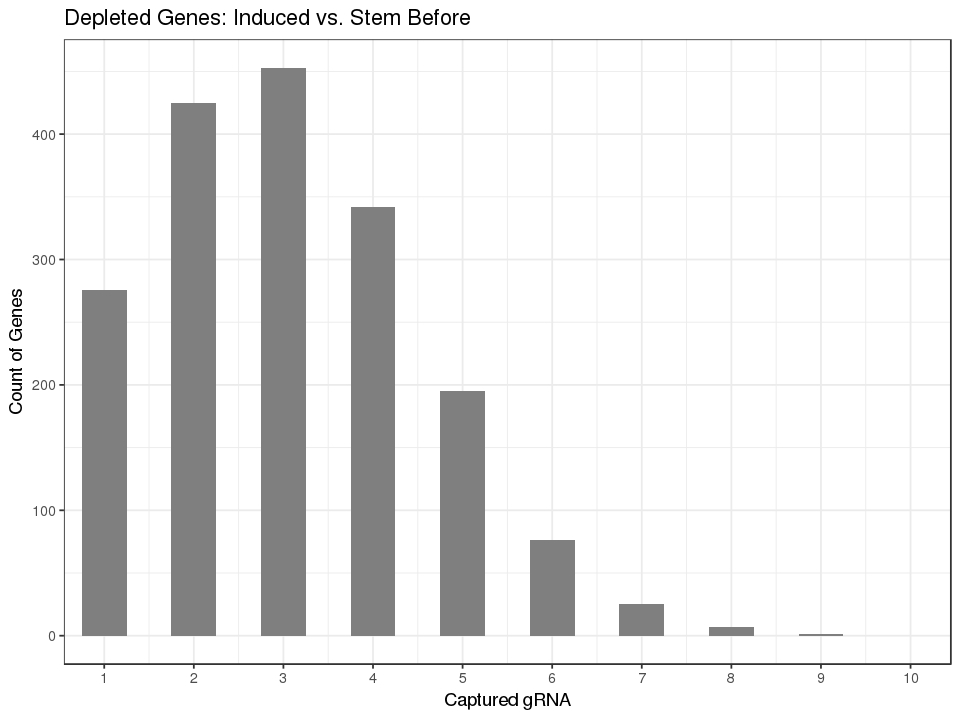

In [91]:
# Induced vs. ES
ggplot(r62depl) + geom_histogram(aes(x=ID), bins = 10, binwidth = .5, fill='grey50') + coord_cartesian(xlim = c(1,10)) + scale_x_continuous(breaks=seq(1, 10, 1)) +
    labs(x="Captured gRNA", y="Count of Genes", title="Depleted Genes: Induced vs. Stem Before")

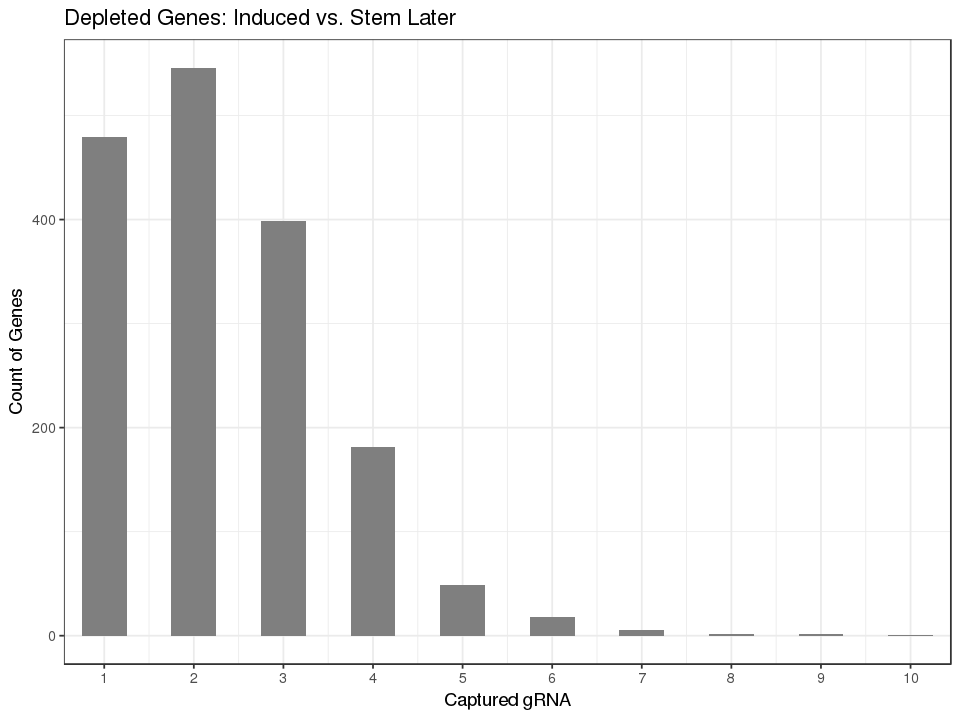

In [92]:
# Induced vs. ES
ggplot(r65depl) + geom_histogram(aes(x=ID), bins = 10, binwidth = .5, fill='grey50') + coord_cartesian(xlim = c(1,10)) + scale_x_continuous(breaks=seq(1, 10, 1)) +
    labs(x="Captured gRNA", y="Count of Genes", title="Depleted Genes: Induced vs. Stem Later")

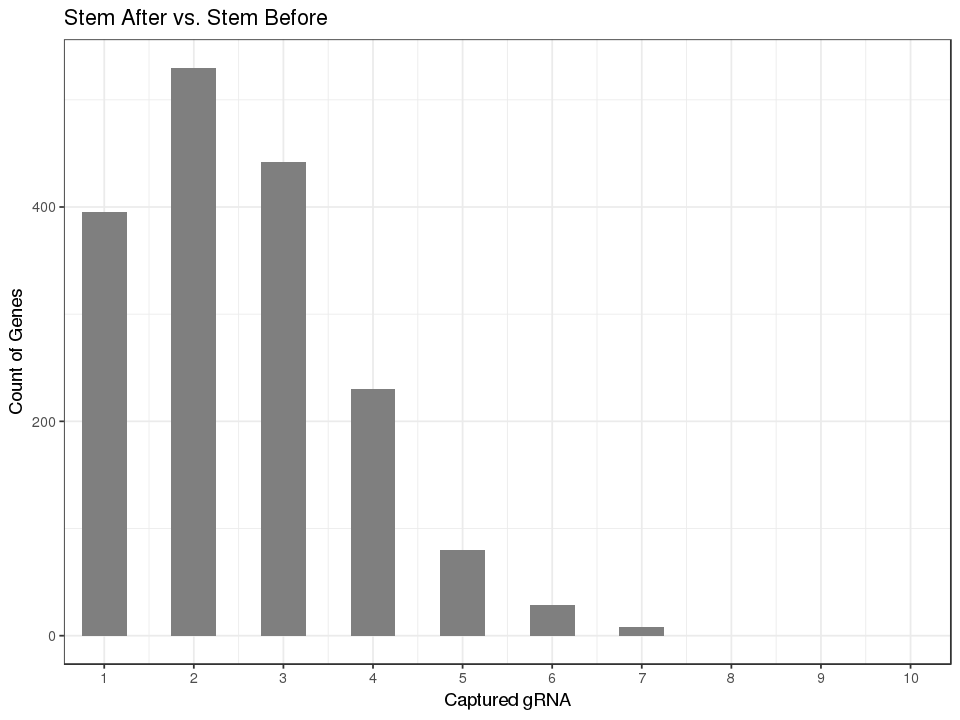

In [93]:
# ES2 vs. ES
ggplot(r52depl, aes(x=ID)) + geom_histogram(binwidth = .5, fill='grey50') + 
    coord_cartesian(xlim = c(1,10)) + scale_x_continuous(breaks=seq(1, 10, 1)) +
    labs(x="Captured gRNA", y="Count of Genes", title="Stem After vs. Stem Before")

## scatter plot  of tdTomato+ vs. tdTomato- vs. +DOX

- X= S8/S7; Y=S8/S6: Z=S7/S6, 3 scatter plots
- color 1: Non target control vs target
- Targeted control: above thresh hold vs. non above thresh hold (90 percentile)

In [15]:
head(screen)

,ID,Gene,S1,S2,S3,S4,S5,S6,S7,S8,⋯,r32,r21flag,r31flag,r32flag,r76,r86,r87,r76flag,r86flag,r87flag
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,GUIDES_sg00000,AATF,0.11595272,0.05571956,0.4096040,0.2904734,0.03575057,0.53129575,0.35367672,1.13e-05,⋯,7.351170e+00,Hit,Non-hit,Non-hit,6.656871e-01,2.126876e-05,3.195008e-05,Non-hit,Non-hit,Non-hit
2,GUIDES_sg00001,AATF,0.02319982,0.00001860,0.0000178,0.0000161,0.01192480,0.00001150,0.00001540,1.13e-05,⋯,9.569892e-01,Hit,Hit,Non-hit,1.339130e+00,9.826087e-01,7.337662e-01,Non-hit,Non-hit,Non-hit
3,GUIDES_sg00002,AATF,0.00001160,0.00001860,0.0000178,0.0000161,0.00001190,0.00001150,0.00001540,1.13e-05,⋯,9.569892e-01,Non-hit,Non-hit,Non-hit,1.339130e+00,9.826087e-01,7.337662e-01,Non-hit,Non-hit,Non-hit
4,GUIDES_sg00003,AATF,0.71884657,0.98406952,0.8726144,0.6777497,1.83459608,1.40906964,0.53819568,1.13e-05,⋯,8.867406e-01,Non-hit,Non-hit,Non-hit,3.819511e-01,8.019476e-06,2.099608e-05,Hit,Non-hit,Non-hit
5,GUIDES_sg00004,AATF,0.04638804,0.01858557,0.0000178,0.0000161,0.09531499,0.05775983,0.00001540,1.13e-05,⋯,9.577325e-04,Hit,Hit,Hit,2.666213e-04,1.956377e-04,7.337662e-01,Hit,Non-hit,Non-hit
6,GUIDES_sg00005,AATF,0.00001160,0.00001860,0.0178259,0.2259273,0.05957633,0.00001150,0.01539196,1.13e-05,⋯,9.583818e+02,Non-hit,Non-hit,Non-hit,1.338431e+03,9.826087e-01,7.341497e-04,Non-hit,Non-hit,Non-hit


In [74]:
screen %>% str

'data.frame':	19838 obs. of  31 variables:
 $ ID     : Factor w/ 19838 levels "GUIDES_sg00000",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Gene   : Factor w/ 2891 levels "AATF","ABL1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ S1     : num  1.16e-01 2.32e-02 1.16e-05 7.19e-01 4.64e-02 ...
 $ S2     : num  5.57e-02 1.86e-05 1.86e-05 9.84e-01 1.86e-02 ...
 $ S3     : num  4.10e-01 1.78e-05 1.78e-05 8.73e-01 1.78e-05 ...
 $ S4     : num  2.90e-01 1.61e-05 1.61e-05 6.78e-01 1.61e-05 ...
 $ S5     : num  3.58e-02 1.19e-02 1.19e-05 1.83 9.53e-02 ...
 $ S6     : num  5.31e-01 1.15e-05 1.15e-05 1.41 5.78e-02 ...
 $ S7     : num  3.54e-01 1.54e-05 1.54e-05 5.38e-01 1.54e-05 ...
 $ S8     : num  1.13e-05 1.13e-05 1.13e-05 1.13e-05 1.13e-05 1.13e-05 1.13e-05 1.13e-05 1.13e-05 1.13e-05 ...
 $ Esb    : num  1.36e-01 2.73e-02 1.36e-05 6.41e-01 9.55e-02 ...
 $ PlC    : num  7.49e-01 3.06e-01 4.86e-06 6.67e-01 3.50e-01 ...
 $ Target : Factor w/ 2 levels "Non-target","Target": 2 2 2 2 2 2 2 2 2 2 ...
 $ r52    : num  0.642 64

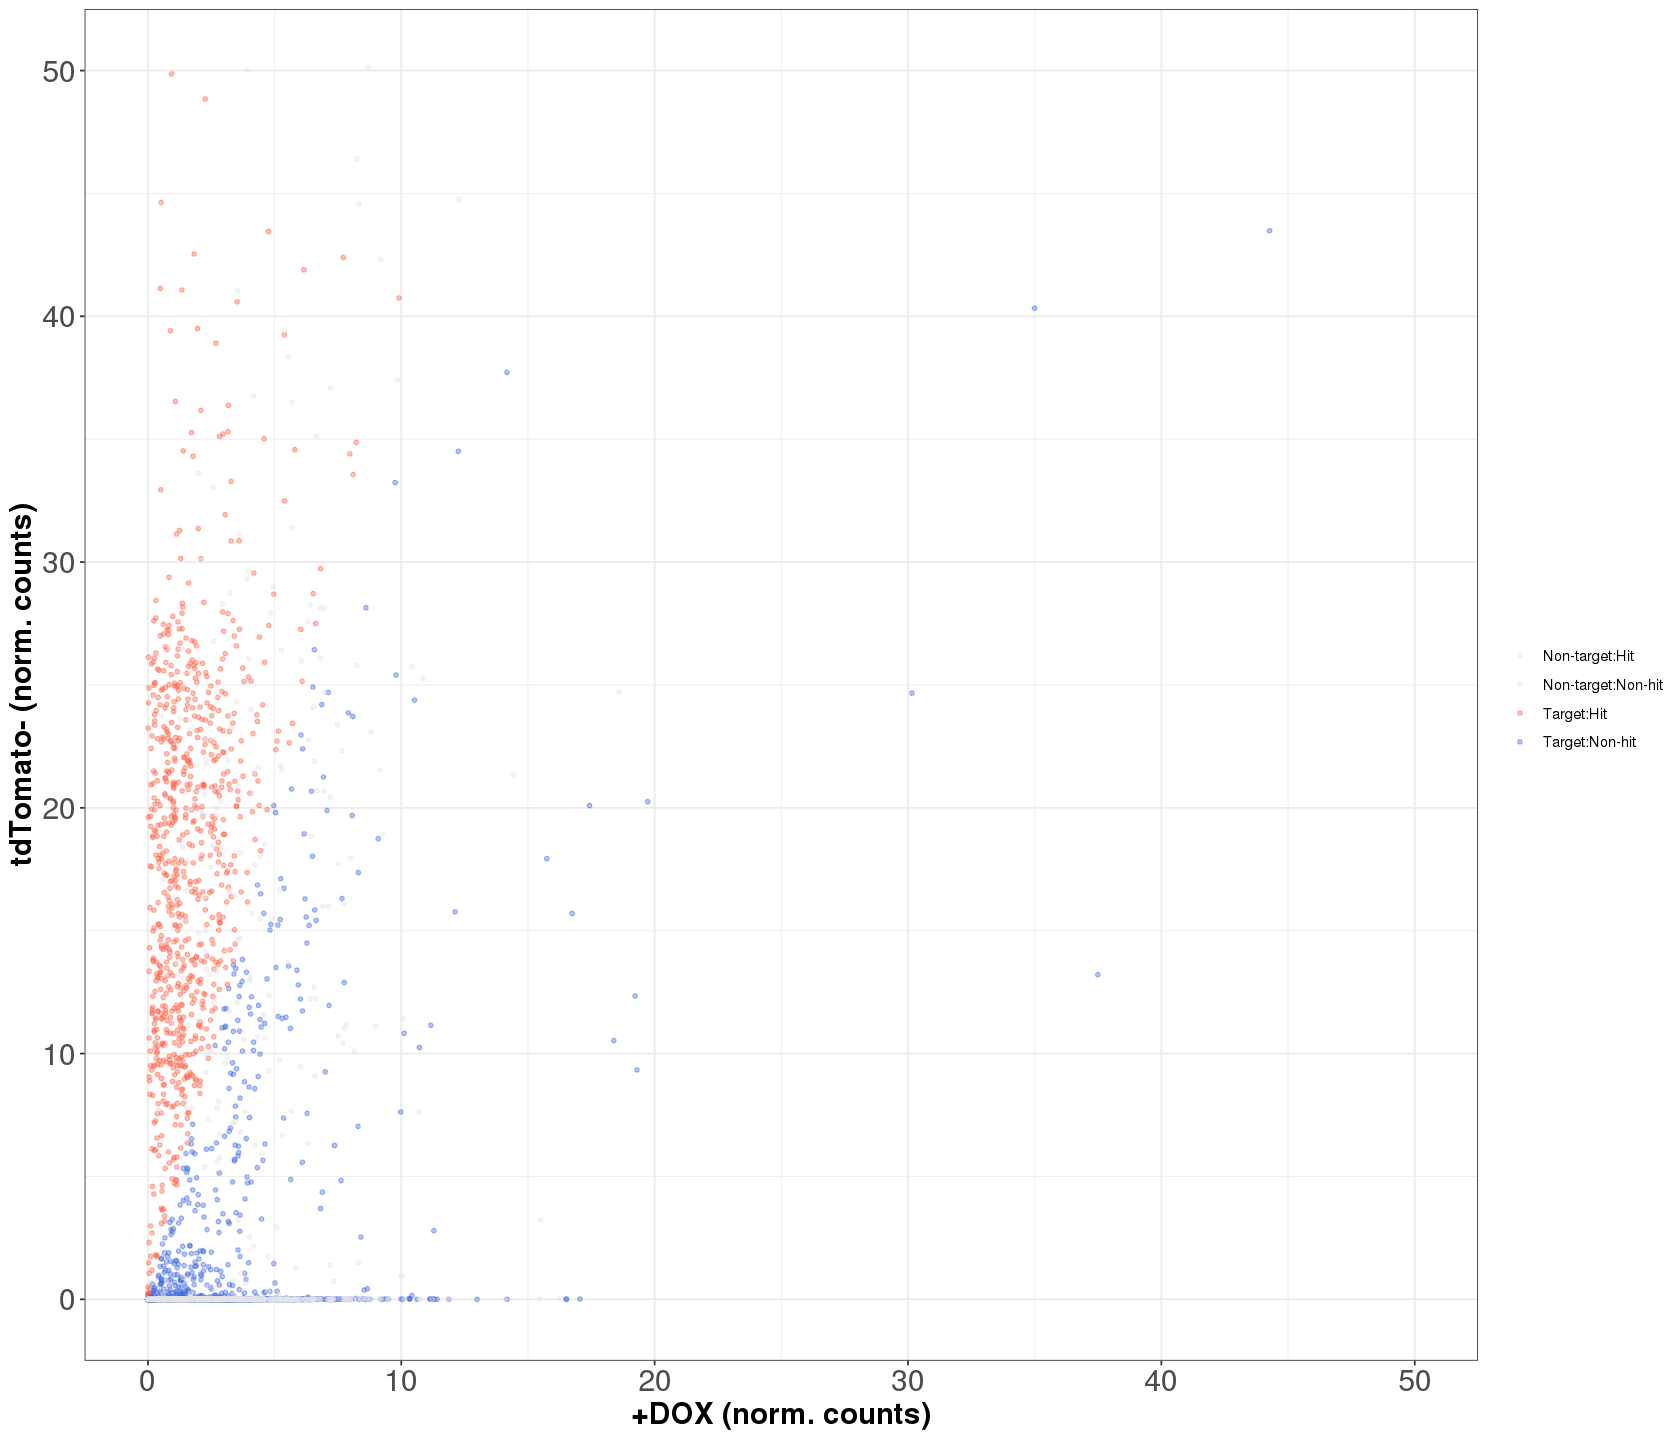

In [16]:
# tdTomato- vs. +DOX
ggplot(screen) + geom_point(aes(x = S6, y = S8, col = Target:r86flag), size=1, alpha=0.4) + 
    coord_cartesian(xlim = c(0,50), ylim = c(0,50)) +
    labs(y="tdTomato- (norm. counts)", x="+DOX (norm. counts)") +
    scale_color_manual(name='',values = c('grey90', 'grey90','tomato','royalblue')) +
    theme(axis.text = element_text(size = 18), axis.title=element_text(size=18, face='bold'))
ggsave("neville_pdf/fig2_C4_td-_vs_Dox.pdf", width = 11, height = 8, units = "in")

In [75]:
screen %>% select(ID, Gene, S6, S8, Target, r86, r86flag) %>% filter(Target == "Target" & r86flag == "Hit") %>% head

,ID,Gene,S6,S8,Target,r86,r86flag
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
1,GUIDES_sg00035,ABTB1,1.1780765,23.27779,Target,19.759146,Hit
2,GUIDES_sg00043,ADNP,0.8315868,15.80007,Target,18.999902,Hit
3,GUIDES_sg00099,AFF1,0.1732564,11.67831,Target,67.404808,Hit
4,GUIDES_sg00116,AFF4,2.1482477,10.60846,Target,4.938192,Hit
5,GUIDES_sg00119,AFF4,1.7209104,35.27141,Target,20.495788,Hit
6,GUIDES_sg00127,AGAP3,0.3696006,7.55656,Target,20.445208,Hit


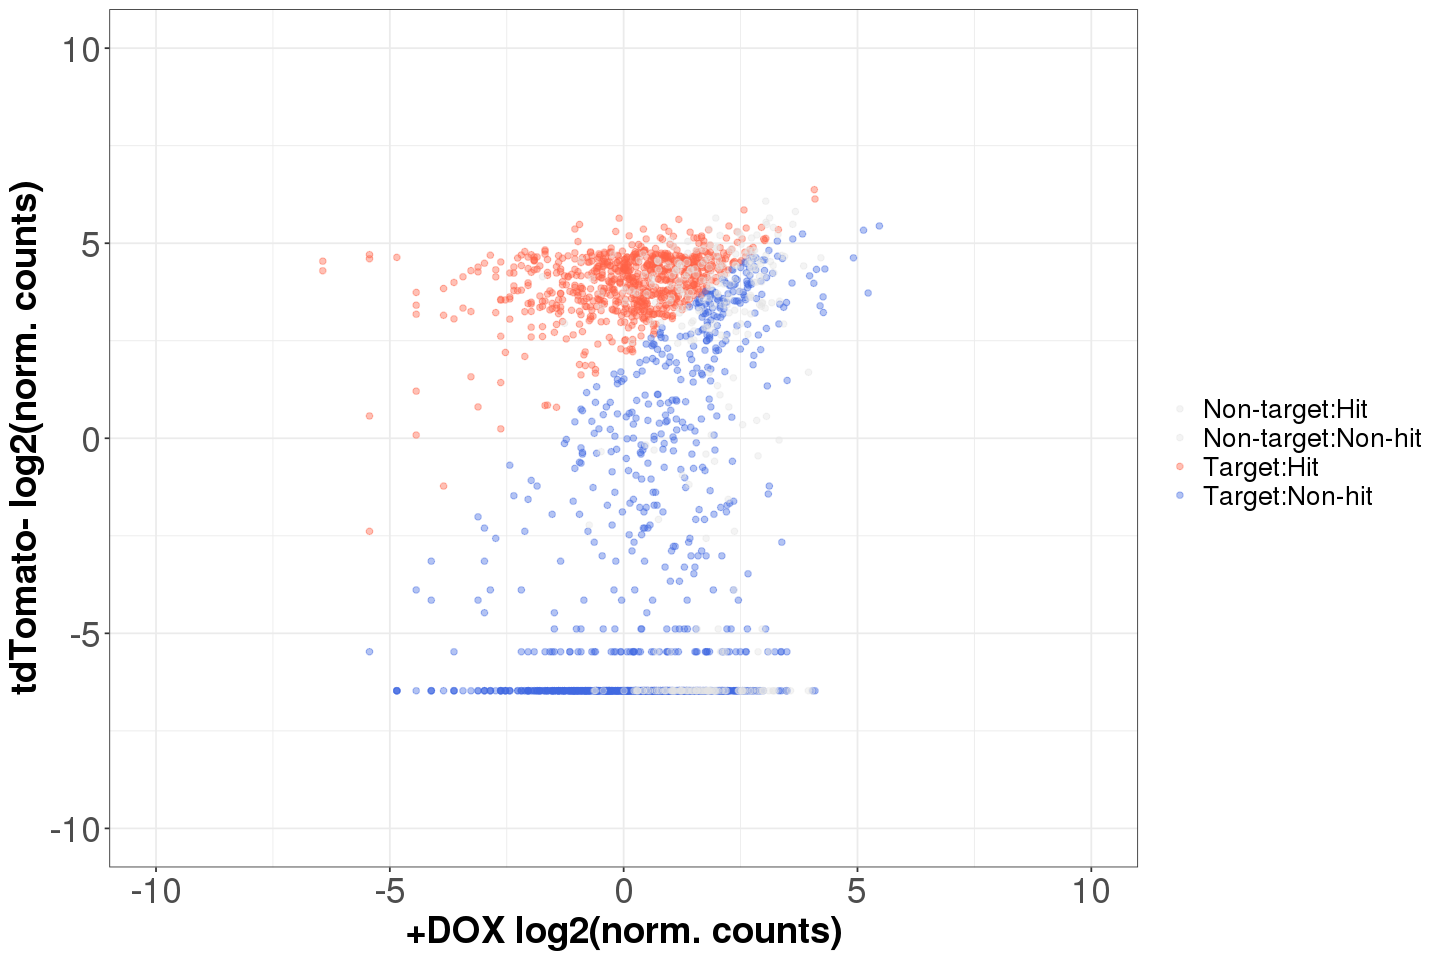

In [50]:
# tdTomato- vs. +DOX
ggplot(screen) + geom_point(aes(x = log2(S6), y = log2(S8), col = Target:r86flag), alpha=0.4) + 
    coord_cartesian(xlim = c(-10,10), ylim = c(-10,10)) +
    labs(y="tdTomato- log2(norm. counts)", x="+DOX log2(norm. counts)") +
    scale_color_manual(name='',values = c('grey90', 'grey90','tomato','royalblue')) +
    theme(axis.text = element_text(size = 22), axis.title=element_text(size=22, face='bold'), 
          legend.text = element_text(size = 16))
#ggsave("neville_pdf/fig2_C4_td-_vs_Dox.pdf", width = 11, height = 8, units = "in")

In [72]:
screen %>% select(ID, Gene, S7, S8, Target, r87flag) %>% filter(Target == "Target" & r87flag == "Hit") 

,ID,Gene,S7,S8,Target,r87flag
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,GUIDES_sg00035,ABTB1,2.4602682,23.27779,Target,Hit
2,GUIDES_sg00043,ADNP,0.9994931,15.80007,Target,Hit
3,GUIDES_sg00099,AFF1,0.0000154,11.67831,Target,Hit
4,GUIDES_sg00116,AFF4,1.6299329,10.60846,Target,Hit
5,GUIDES_sg00119,AFF4,1.3224013,35.27141,Target,Hit
6,GUIDES_sg00127,AGAP3,0.2306641,7.55656,Target,Hit


In [65]:
screen %>% select(ID, Gene, S7, S8, Target, r87flag) %>% filter(Target == "Target" & r87flag == "Hit") %>% head

,ID,Gene,S7,S8,Target,r87flag
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,GUIDES_sg00035,ABTB1,2.4602682,23.27779,Target,Hit
2,GUIDES_sg00043,ADNP,0.9994931,15.80007,Target,Hit
3,GUIDES_sg00099,AFF1,0.0000154,11.67831,Target,Hit
4,GUIDES_sg00116,AFF4,1.6299329,10.60846,Target,Hit
5,GUIDES_sg00119,AFF4,1.3224013,35.27141,Target,Hit
6,GUIDES_sg00127,AGAP3,0.2306641,7.55656,Target,Hit


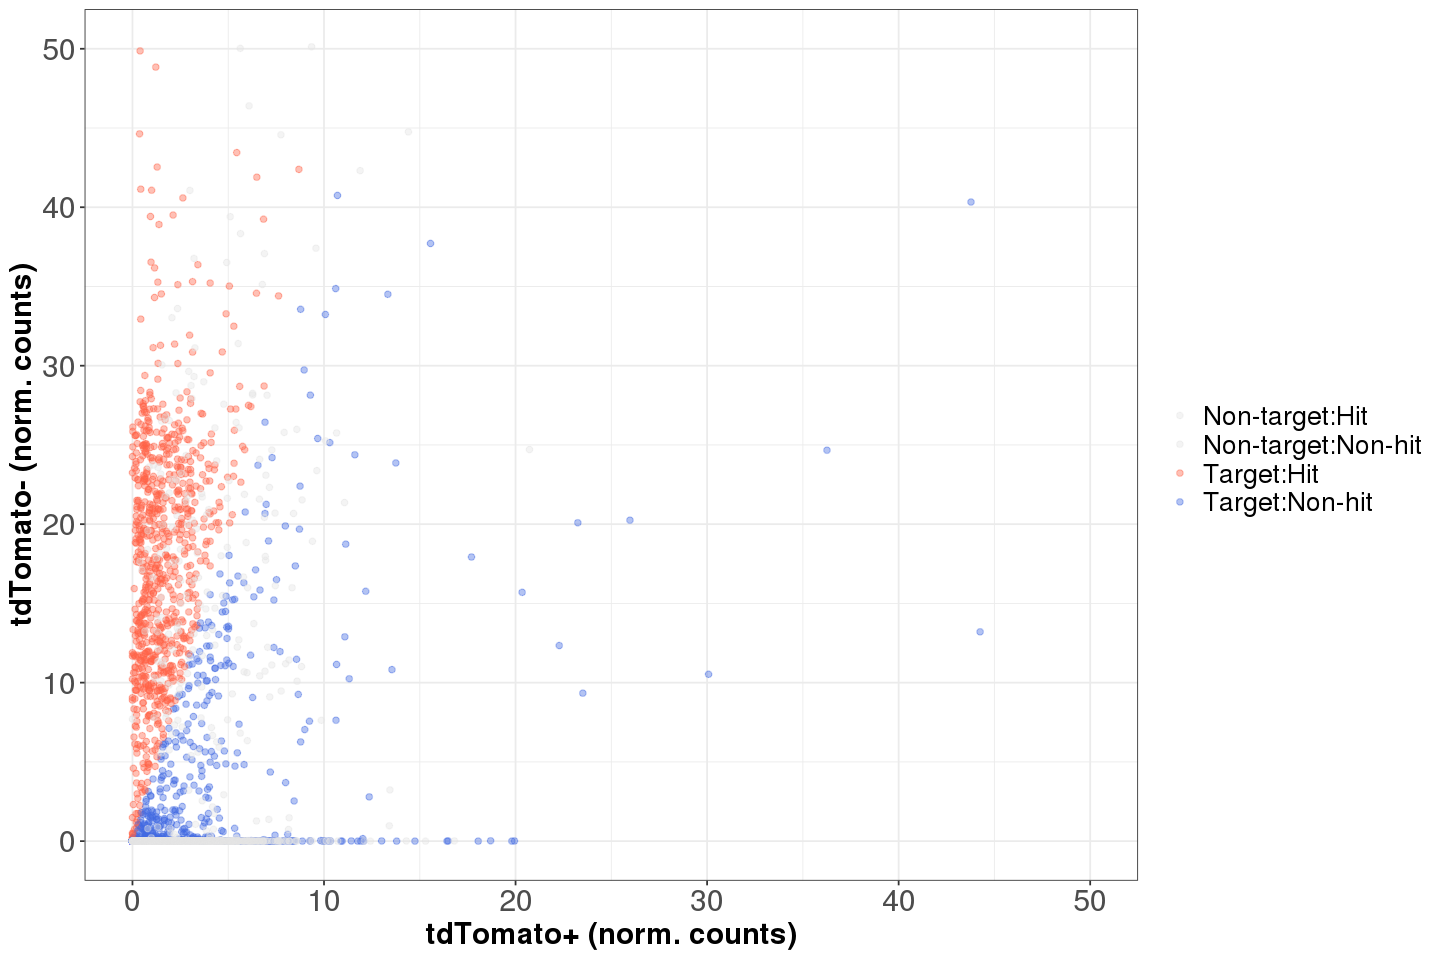

In [45]:
# tdTomato- vs. +tdTomato+
ggplot(screen) + geom_point(aes(x = S7, y = S8, col = Target:r87flag), alpha=0.4) + 
    coord_cartesian(xlim = c(0,50), ylim = c(0,50)) +
    labs(y="tdTomato- (norm. counts)", x="tdTomato+ (norm. counts)") +
    scale_color_manual(name='',values = c('grey90', 'grey90','tomato','royalblue')) +
    theme(axis.text = element_text(size = 18), axis.title=element_text(size=18, face='bold'),
         legend.text = element_text(size = 16))
#ggsave("neville_pdf/fig2_C5_td-_vs_td+.pdf", width = 11, height = 8, units = "in")

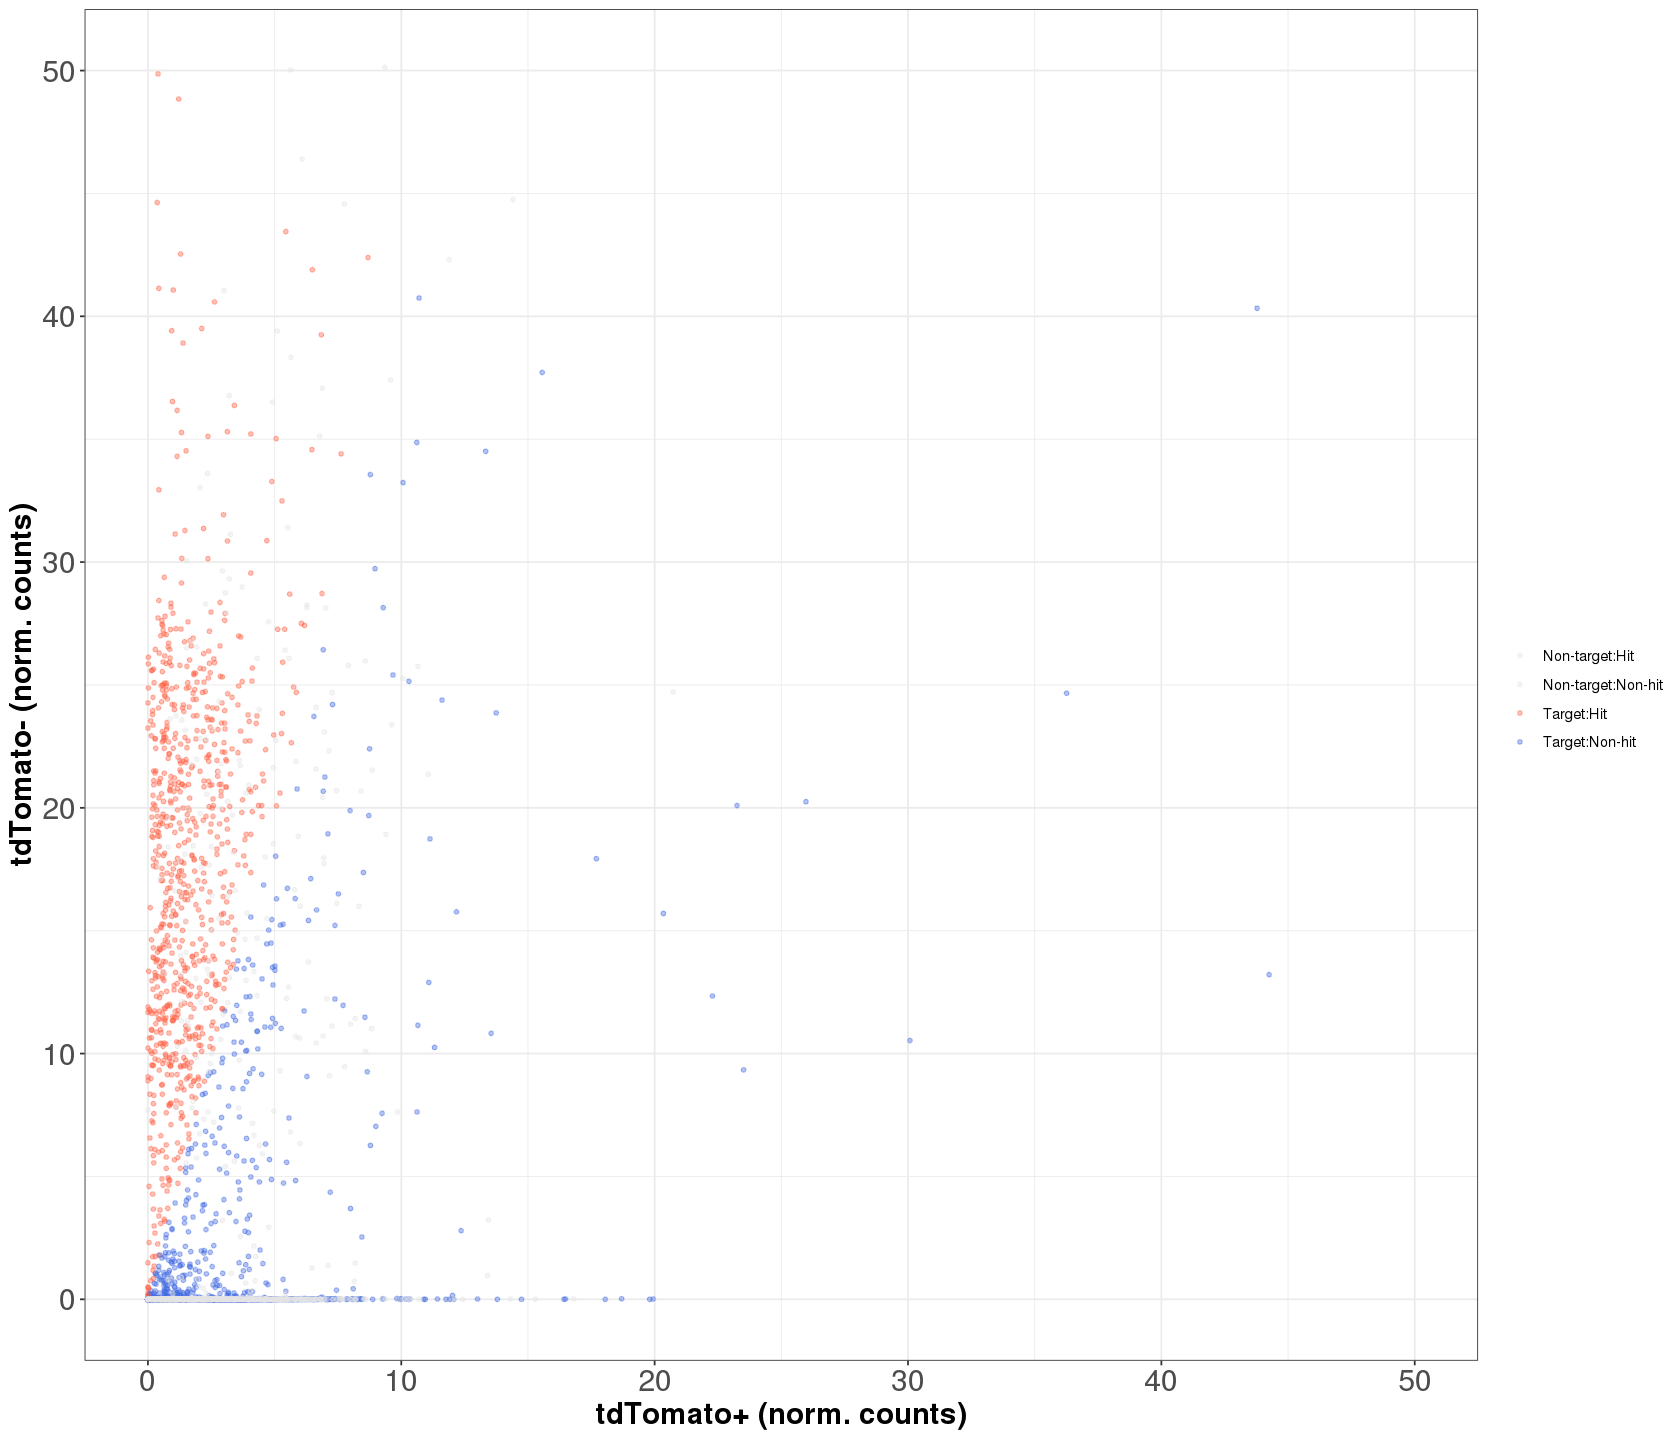

In [39]:
# tdTomato- vs. +tdTomato+
ggplot(screen) + geom_point(aes(x = S7, y = S8, col = Target:r87flag), size=1, alpha=0.4) + 
    coord_cartesian(xlim = c(0,50), ylim = c(0,50)) +
    labs(y="tdTomato- (norm. counts)", x="tdTomato+ (norm. counts)") +
    scale_color_manual(name='',values = c('grey90', 'grey90','tomato','royalblue')) +
    theme(axis.text = element_text(size = 18), axis.title=element_text(size=18, face='bold'))
ggsave("neville_pdf/fig2_C5_td-_vs_td+.pdf", width = 11, height = 8, units = "in")

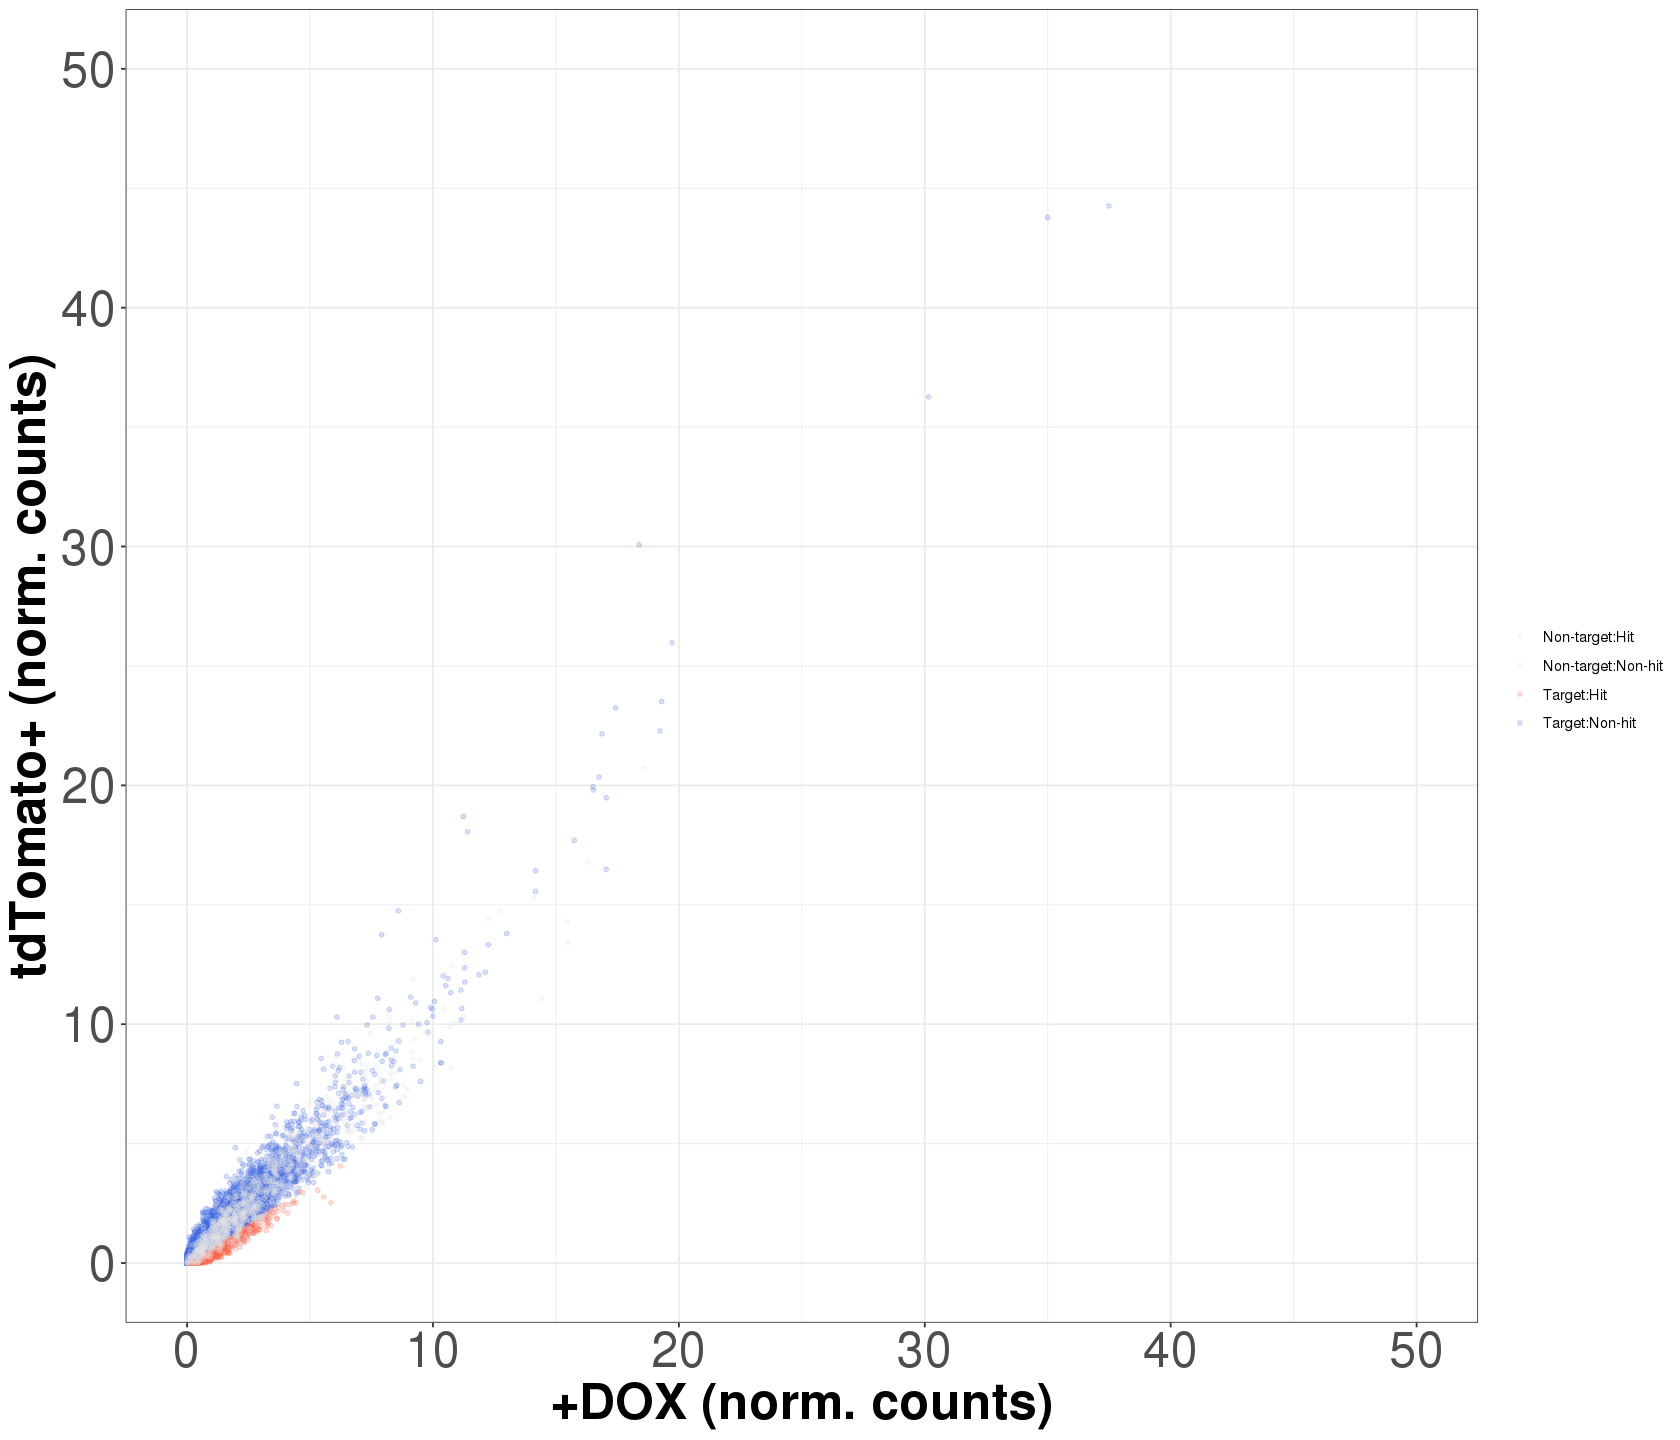

In [40]:
# tdTomato+ vs. +DOX
ggplot(screen) + geom_point(aes(x = S6, y = S7, col = Target:r76flag), size=1, alpha=0.2) + 
    coord_cartesian(xlim = c(0,50), ylim = c(0,50)) +
    labs(y="tdTomato+ (norm. counts)", x="+DOX (norm. counts)") +
    scale_color_manual(name='',values = c('grey90', 'grey90','tomato','royalblue')) +
    theme(axis.text = element_text(size = 30), axis.title=element_text(size=30, face='bold'))
ggsave("neville_pdf/fig2_C6_td+_vs_dox.pdf", width = 11, height = 8, units = "in")

## Density plot

Columns: `PlC, S1, S5, S6, S7, S8`

In [26]:
tail(screen[screen$Target == 'Target',])

,ID,Gene,S1,S2,S3,S4,S5,S6,S7,S8,⋯,r32,r21flag,r31flag,r32flag,r76,r86,r87,r76flag,r86flag,r87flag
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
18833,GUIDES_sg18832,ZZZ3,0.05798216,0.22282256,0.1424826,0.37115592,0.4050500,0.39269987,0.18453434,0.0000113,⋯,0.6394441,Non-hit,Non-hit,Hit,0.4699119,2.877516e-05,6.123522e-05,Hit,Non-hit,Non-hit
18834,GUIDES_sg18833,ZZZ3,0.24348796,0.18568856,0.2849473,0.14524475,0.3454856,0.43889850,0.55357226,17.5343580,⋯,1.5345443,Non-hit,Non-hit,Non-hit,1.2612763,3.995083e+01,3.167492e+01,Non-hit,Hit,Hit
18835,GUIDES_sg18834,ZZZ3,0.04638804,0.11142056,0.1068664,0.01615265,0.0000119,0.04621018,0.15378118,0.0000113,⋯,0.9591261,Non-hit,Non-hit,Non-hit,3.3278639,2.445349e-04,7.348103e-05,Non-hit,Non-hit,Non-hit
18836,GUIDES_sg18835,ZZZ3,0.54493488,0.07428656,0.2315230,0.32274639,0.6433077,0.68144128,0.75346780,0.0000113,⋯,3.1166206,Hit,Hit,Non-hit,1.1056973,1.658250e-05,1.499732e-05,Non-hit,Non-hit,Non-hit
18837,GUIDES_sg18836,ZZZ3,0.15073506,0.12998756,0.1068664,0.08069870,0.2144438,0.23100468,0.26141724,0.0000113,⋯,0.8221277,Non-hit,Non-hit,Non-hit,1.1316534,4.891676e-05,4.322592e-05,Non-hit,Non-hit,Non-hit
18838,GUIDES_sg18837,ZZZ3,0.23189384,0.00001860,0.0178259,0.08069870,0.0834021,0.16170674,0.04614512,0.0000113,⋯,958.3818280,Hit,Hit,Non-hit,0.2853630,6.987959e-05,2.448796e-04,Hit,Non-hit,Non-hit


In [27]:
TF_density = gather(screen[screen$Target == 'Target',c('PlC', 'S1','S5','S6', 'S7', 'S8')], key = 'Sample', value = 'Norm_Counts' )
NTC_density = gather(screen[screen$Target == 'Non-target',c('PlC', 'S1','S5','S6', 'S7', 'S8')], key = 'Sample', value = 'Norm_Counts' )

In [28]:
str(TF_density)
str(NTC_density)

'data.frame':	113028 obs. of  2 variables:
 $ Sample     : chr  "PlC" "PlC" "PlC" "PlC" ...
 $ Norm_Counts: num  7.49e-01 3.06e-01 4.86e-06 6.67e-01 3.50e-01 ...
'data.frame':	6000 obs. of  2 variables:
 $ Sample     : chr  "PlC" "PlC" "PlC" "PlC" ...
 $ Norm_Counts: num  0.715 2.467 0.881 1.498 0.204 ...


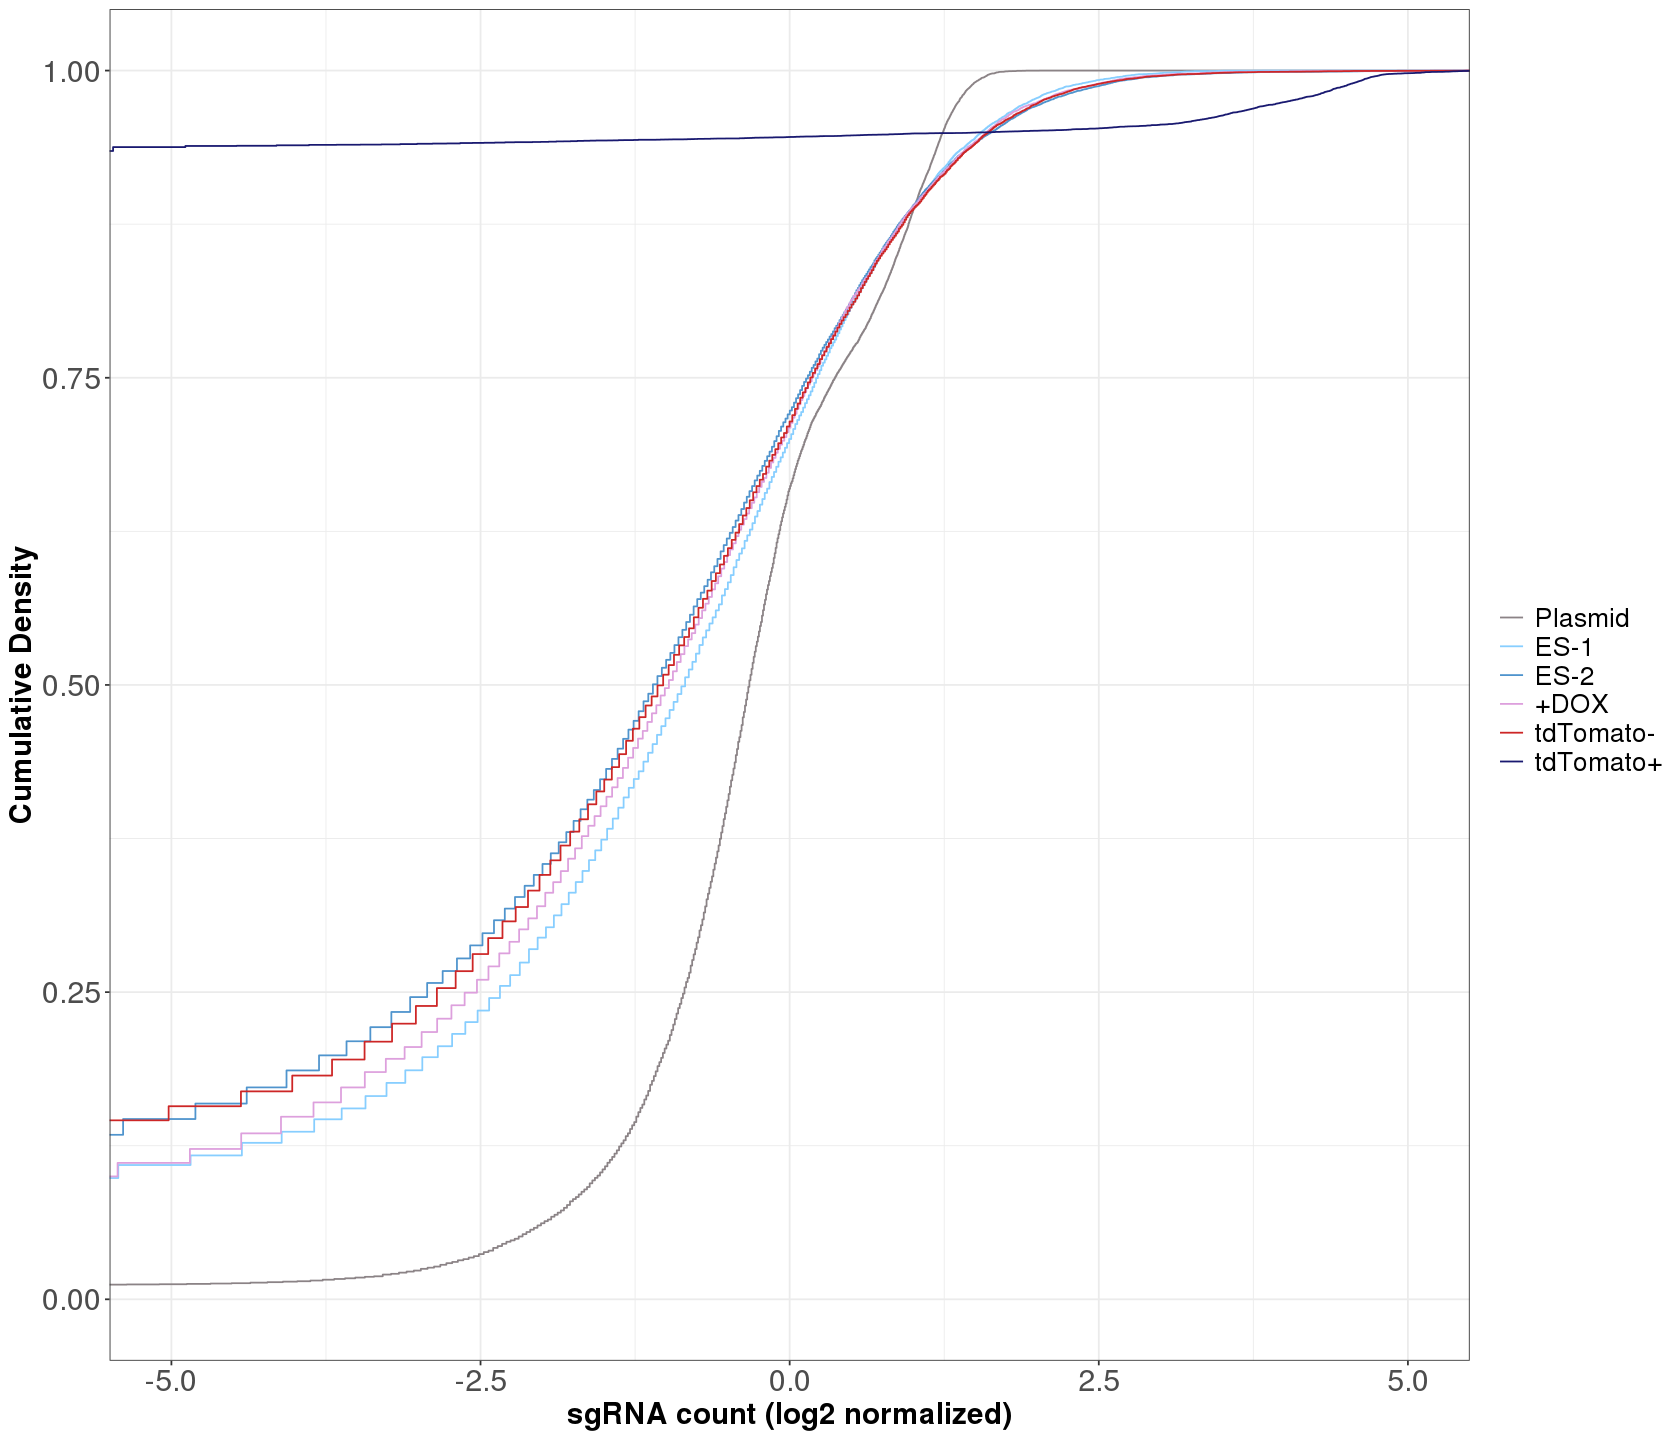

In [41]:
tf_density_plot <- ggplot(data = TF_density) + stat_ecdf(aes(x=log2(Norm_Counts), color=Sample)) +
    coord_cartesian(xlim = c(-5,5), ylim = c(0,1)) +
    labs(y="Cumulative Density", x="sgRNA count (log2 normalized)") +
    scale_color_manual(labels=c("Plasmid","ES-1","ES-2","+DOX","tdTomato-","tdTomato+"),values = c('lavenderblush4', 'skyblue1', 'steelblue3', 'plum',  'firebrick3', 'midnightblue')) +
    theme(axis.text = element_text(size = 18), axis.title=element_text(size=18, face='bold')) +
    theme(legend.text = element_text(size = 16), legend.title = element_blank())
plot(tf_density_plot)
ggsave("neville_pdf/fig2_B2_TF-sgRNAs.pdf", width = 11, height = 8, units = "in")

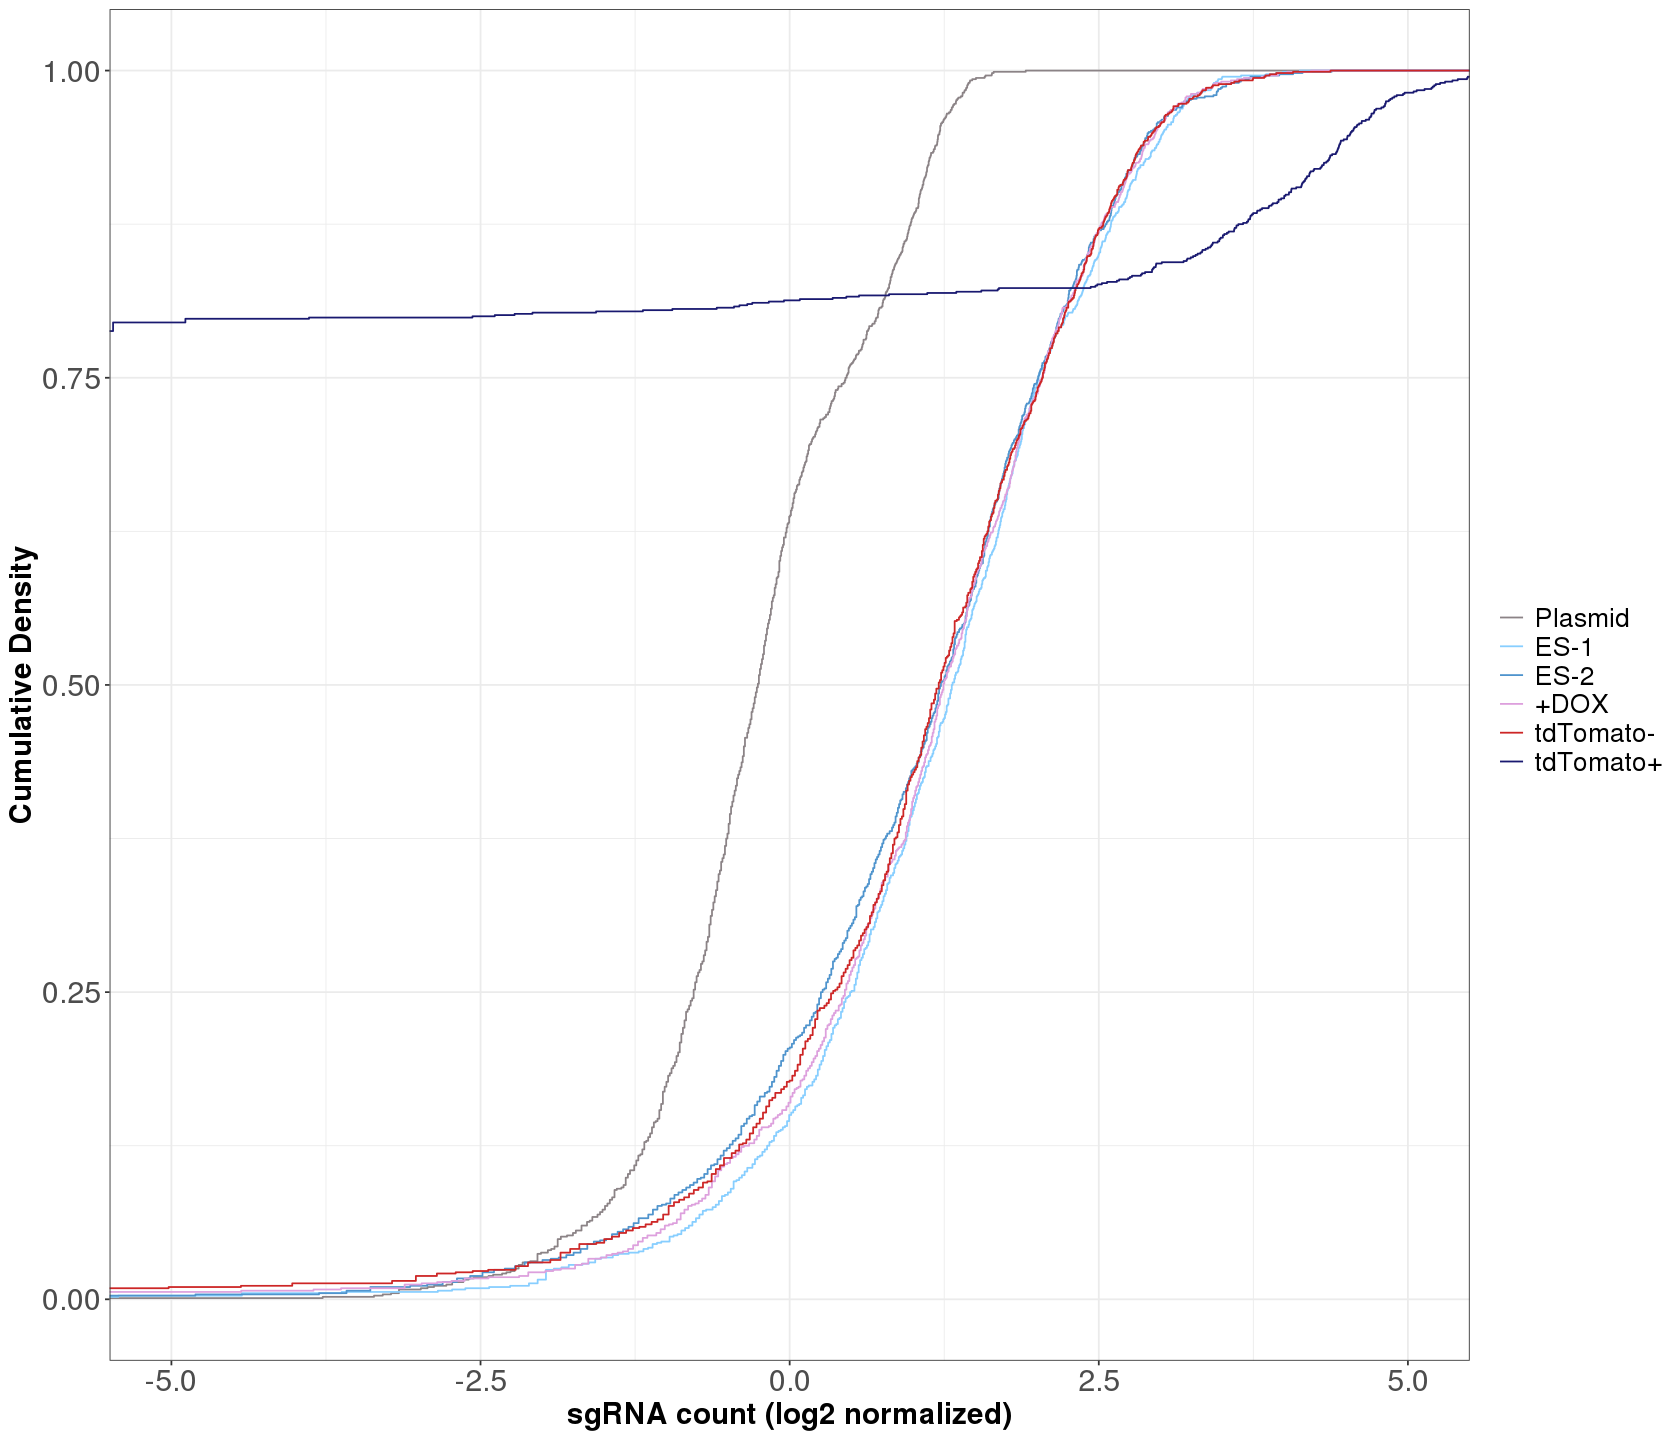

In [42]:
ntc_density_plot <- ggplot(data = NTC_density) + stat_ecdf(aes(x=log2(Norm_Counts), color=Sample)) +
    coord_cartesian(xlim = c(-5,5), ylim = c(0,1)) +
    labs(y="Cumulative Density", x="sgRNA count (log2 normalized)") +
    scale_color_manual(labels=c("Plasmid","ES-1","ES-2","+DOX","tdTomato-","tdTomato+"),values = c('lavenderblush4', 'skyblue1', 'steelblue3', 'plum',  'firebrick3', 'midnightblue')) +
    theme(axis.text = element_text(size = 18), axis.title=element_text(size=18, face='bold')) +
    theme(legend.text = element_text(size = 16), legend.title = element_blank())
plot(ntc_density_plot)
ggsave("neville_pdf/fig2_B1_NTC-sgRNAs.pdf", width = 11, height = 8, units = "in")

#### guide venn diagram (fig 4A)

In [102]:
target_hits_86 <- select(screen, ID, Gene, r86, Target, r86flag) %>% 
                    filter(Target == "Target" & r86flag == "Hit") 

In [103]:
target_hits_87 <- select(screen, ID, Gene, r87, Target, r87flag) %>% 
                    filter(Target == "Target" & r87flag == "Hit") 

In [104]:
target_hits_86 %>% head

,ID,Gene,r86,Target,r86flag
,<fct>,<fct>,<dbl>,<fct>,<fct>
1,GUIDES_sg00035,ABTB1,19.759146,Target,Hit
2,GUIDES_sg00043,ADNP,18.999902,Target,Hit
3,GUIDES_sg00099,AFF1,67.404808,Target,Hit
4,GUIDES_sg00116,AFF4,4.938192,Target,Hit
5,GUIDES_sg00119,AFF4,20.495788,Target,Hit
6,GUIDES_sg00127,AGAP3,20.445208,Target,Hit


In [105]:
common_guides_86_87 <- intersect (target_hits_86$ID, target_hits_87$ID)

In [107]:
corr_86_87 <- inner_join(filter(target_hits_86, ID %in% common_guides_86_87), 
           select(filter(target_hits_87, ID %in% common_guides_86_87), ID:r87),
          by = c("ID", "Gene"))

In [ ]:
ggplot(ge_trend_plot) + geom_point(aes(time, num, color=direction), size=8) +
            theme_classic() + 
            theme(axis.text=element_text(size=16), axis.title=element_text(size=16,face="bold"),
                  legend.text=element_text(size=16),legend.title=element_text(size=16)) +
            labs(title = "Number of significant genes (RNA-seq)") + 
            xlab("Time Points") + ylab("Number of genes") 

In [135]:
quantile(corr_86_87$r86, probs = .95)
quantile(corr_86_87$r87, probs = .95)

95% 
102.5177

95% 
118.5548

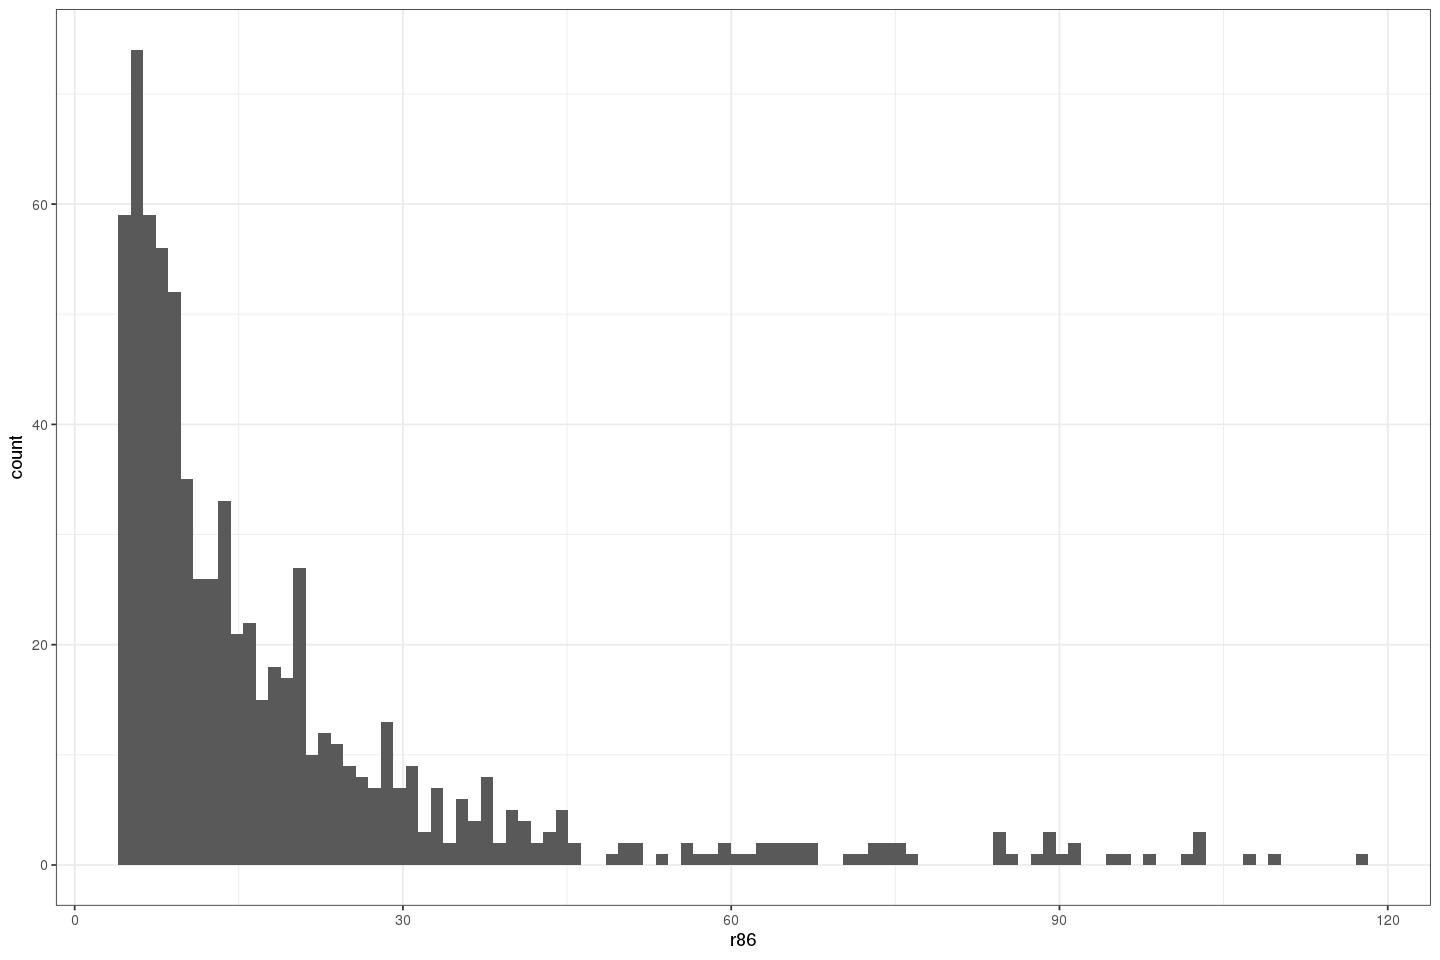

In [136]:
corr_86_87 %>% filter(r86 < 118) %>% 
        ggplot() + geom_histogram(aes(r86), bins = 100)

In [137]:
head(corr_86_87)

,ID,Gene,r86,Target,r86flag,r87
,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,GUIDES_sg00035,ABTB1,19.759146,Target,Hit,9.461483e+00
2,GUIDES_sg00043,ADNP,18.999902,Target,Hit,1.580808e+01
3,GUIDES_sg00099,AFF1,67.404808,Target,Hit,7.583321e+05
4,GUIDES_sg00116,AFF4,4.938192,Target,Hit,6.508526e+00
5,GUIDES_sg00119,AFF4,20.495788,Target,Hit,2.667225e+01
6,GUIDES_sg00127,AGAP3,20.445208,Target,Hit,3.276002e+01


In [117]:
screen %>% filter(ID == "GUIDES_sg00043")

ID,Gene,S1,S2,S3,S4,S5,S6,S7,S8,⋯,r32,r21flag,r31flag,r32flag,r76,r86,r87,r76flag,r86flag,r87flag
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
GUIDES_sg00043,ADNP,1.031888,1.59678,1.531514,1.69435,1.012607,0.8315868,0.9994931,15.80007,⋯,0.9591261,Non-hit,Non-hit,Non-hit,1.201911,18.9999,15.80808,Non-hit,Hit,Hit


In [86]:
library(VennDiagram)

Loading required package: grid

Loading required package: futile.logger



In [109]:
vp.d1 <- venn.diagram(x=list(target_hits_86$ID, target_hits_87$ID),
             category.names = c("td- vs. Dox", "td- vs. td+"), 
             filename=NULL, 
             output = F, 
            
             # Output features
            imagetype="png" ,
            height = 300 , 
            width = 300 , 
            resolution = 300,
            compression = "lzw",

            # Circles
            lwd = 2,
            lty = 'blank',
            fill = c('#B3E2CD', '#FDCDAC'),

            # Numbers
            cex = 2,
            fontface = "bold",
            fontfamily = "sans",

            # Set names
            cat.cex = 2,
            cat.fontface = "bold",
            cat.default.pos = "outer",
            #cat.pos = c(-27, 27, 135),
            #cat.dist = c(.1, .1, .1),
            cat.fontfamily = "sans"
            )

In [230]:
getwd()

[1] "/gpfs/commons/groups/sanjana_lab/cdai/TFscreen"

In [229]:
dir(".", "screen_venn.pdf")

[1] "screen_venn.pdf"

In [228]:
pdf("screen_venn.pdf", width = 11, height = 8,)
grid.draw(vp.d1)
dev.off()

png 
  2

In [190]:
str(corr_86_87) 

'data.frame':	766 obs. of  6 variables:
 $ ID     : Factor w/ 19838 levels "GUIDES_sg00000",..: 36 44 100 117 120 128 144 147 151 154 ...
 $ Gene   : Factor w/ 2891 levels "AATF","ABL1",..: 4 5 10 12 12 13 15 15 16 16 ...
 $ r86    : num  19.76 19 67.4 4.94 20.5 ...
 $ Target : Factor w/ 2 levels "Non-target","Target": 2 2 2 2 2 2 2 2 2 2 ...
 $ r86flag: Factor w/ 2 levels "Hit","Non-hit": 1 1 1 1 1 1 1 1 1 1 ...
 $ r87    : num  9.46 1.58e+01 7.58e+05 6.51 2.67e+01 ...


In [138]:
cor_data <- filter(corr_86_87, r86 < 118 & r87 < 118)

In [199]:
corr_86_87 %>% str

'data.frame':	766 obs. of  6 variables:
 $ ID     : Factor w/ 19838 levels "GUIDES_sg00000",..: 36 44 100 117 120 128 144 147 151 154 ...
 $ Gene   : Factor w/ 2891 levels "AATF","ABL1",..: 4 5 10 12 12 13 15 15 16 16 ...
 $ r86    : num  19.76 19 67.4 4.94 20.5 ...
 $ Target : Factor w/ 2 levels "Non-target","Target": 2 2 2 2 2 2 2 2 2 2 ...
 $ r86flag: Factor w/ 2 levels "Hit","Non-hit": 1 1 1 1 1 1 1 1 1 1 ...
 $ r87    : num  9.46 1.58e+01 7.58e+05 6.51 2.67e+01 ...


In [200]:
corr_86_87 %>% str

'data.frame':	766 obs. of  6 variables:
 $ ID     : Factor w/ 19838 levels "GUIDES_sg00000",..: 36 44 100 117 120 128 144 147 151 154 ...
 $ Gene   : Factor w/ 2891 levels "AATF","ABL1",..: 4 5 10 12 12 13 15 15 16 16 ...
 $ r86    : num  19.76 19 67.4 4.94 20.5 ...
 $ Target : Factor w/ 2 levels "Non-target","Target": 2 2 2 2 2 2 2 2 2 2 ...
 $ r86flag: Factor w/ 2 levels "Hit","Non-hit": 1 1 1 1 1 1 1 1 1 1 ...
 $ r87    : num  9.46 1.58e+01 7.58e+05 6.51 2.67e+01 ...


In [203]:
cor.test(corr_86_87$r86, corr_86_87$r87, method = "spearman")

Warning message in cor.test.default(corr_86_87$r86, corr_86_87$r87, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  corr_86_87$r86 and corr_86_87$r87
S = 7199537, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9038896 


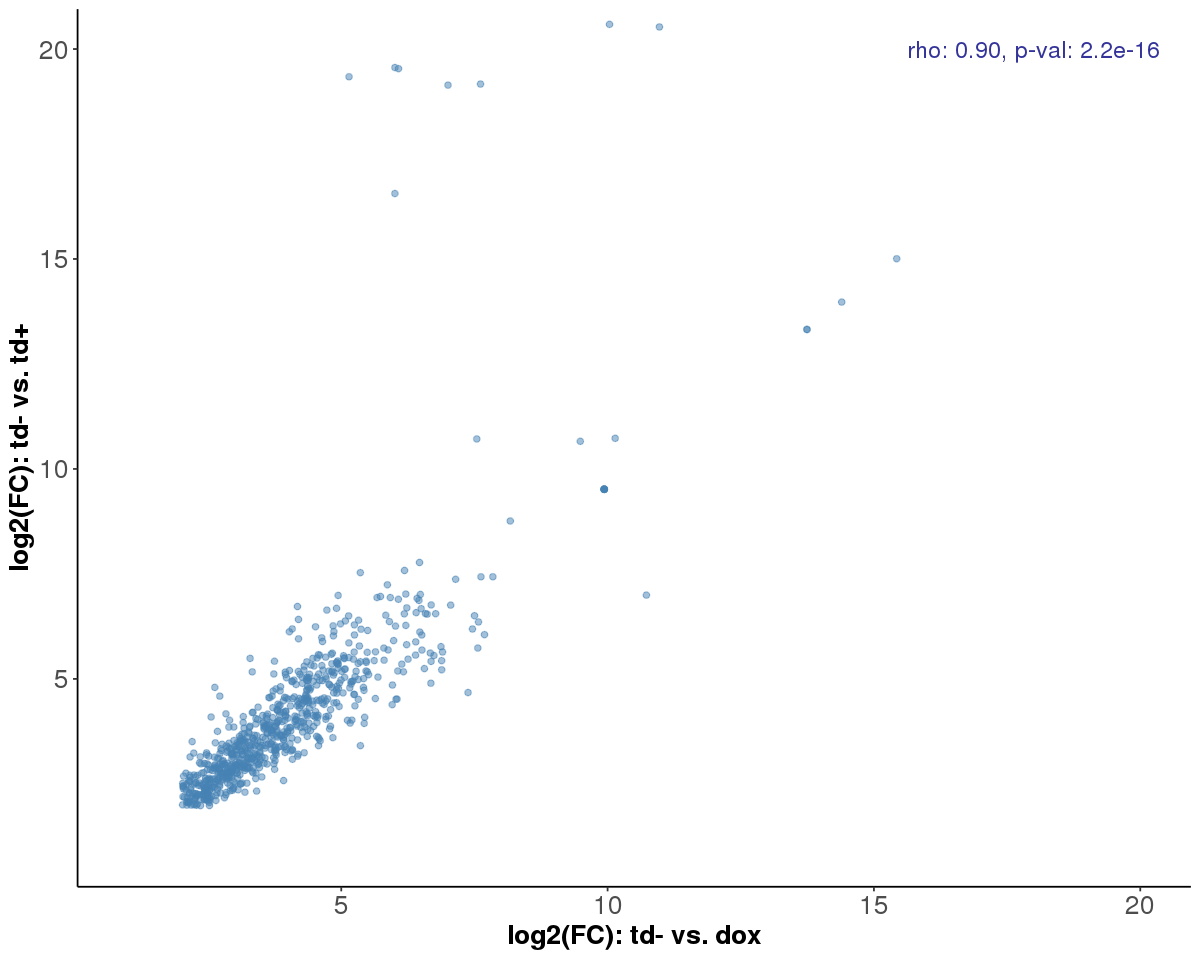

In [235]:
corr_86_87 %>% ggplot() + 
    geom_point(aes(log2(r86), log2(r87)), alpha = .5, color = "steelblue") +
    annotate("text", x = 18, y = 20, label = "rho: 0.90, p-val: 2.2e-16", 
             color = "navy", size = 5, alpha=.8) +
    coord_cartesian(xlim = 1:20, ylim = 1:20) +
    theme_classic() + 
    xlab("log2(FC): td- vs. dox") + 
    ylab("log2(FC): td- vs. td+") +
    theme(axis.text=element_text(size=16), axis.title=element_text(size=16,face="bold"),
          legend.text=element_text(size=16),legend.title=element_text(size=16), text = element_text(size=16)) 
ggsave("neville_pdf/screen_log2_ratio_scatter.pdf", width = 11, height = 8, units = "in")